# Decision Tree Regressor

### Geral
Algoritmos de árvore são não paramétrico com a vantagem de poderem ser utilizados tanto para classificação, como para regressão.  Se baseia na estratégia de estratificação e segmentação do espaço em regiões terminais através de divisões recursivas unidimensionais sob os features (portanto derivando zonas terminais de característica retangular - que são as folhas da árvore). Para realizar uma previsão se utiliza a média (regressão) ou moda (classificação) dos registros de treinos contidos na região cujo ponto de teste se localiza (seguida a lógica dos splits até a zona terminal, ou folha do ponto de teste a ser analisado)

São algoritmos simples e intuitivos, e ferramentas poderosas de análises - pois são capazes de gerar insights de negócio pois apresenta uma visão didática do funcionamento do modelo assim como relação entre a variável respostas e os features - podendo ser representado de maneira gráfica. Vale notar que seu poder preditivo costuma ser inferior quando comparado com outras técnicas de Machine Learning mais robustas tais como SVC, técnicas de Boosting ou Bagging.

As respostas proporcionadas por arvores regressoras possui um característica step, em que os resultados são dados em intervalos e não de comportamento não suave, e que pode muitas vezes ocasionar overfitting.

### Pros e Contras

**Vantagens**
- Capazes de capturar relações não lineares com alta interpretabilidade (não paramétrico) - considerado um "white box" - com decisões simples
- Não é necessário normalizar os dados, pois cada split considera apenas uma dimensão por step de quebra
- Lidam com categoricas sem precisar dummizar
- Pode-se visualizar as variáveis que proporcionar maior ganho de informação e se determinar a feature importance dos preditores
- Podem ser utilizadas tanto para regressão como para classificação
- Possíveis de ser representadas graficamente, podendo gerar insight negócio, sendo que a lógica utilizada para classificar é maior próximo de um "olhar humano"
- É naturalmente um algoritmo multiclass (não é necessário fazer adaptações)
- O custo de predição é logarítmico em relação ao número de registros utilizados no treino

**Desvantagens**
- Podem ser tendenciosas a ter overfitting, caso não tenha devido prunning - onde passa a ser importante se justar a profundidade máxima e o número de mínimo de registros por folha 
- São greedy (gulosa) , consideram localmente divisões sem considerar os próximos splits
- Podem ser instáveis : pequenas variações no conjunto de treino proporcionam arvores bem diferentes (problema normalmente contornado pelo uso de ensemble)
- As previsões não são normalmente contínuas nem smooth (quebras exatas)
- Encontrar árvores é considerado um "NP problem" -  o que faz aplicar heurísitica como a busca greedy por parâmetros adequado de quebras (o que não garante uma resposta global)
- É impactado pelo desbalanceamento de classes
- Performance costuma ser inferior quando comparado com modelos mais potentes (boosting, bagging, SVC)

### Principais Parametros

- criterion: função utilizada para medir qualidade do split. Para regressão o default é mse, para classficação é o gini. 
- max_depth: profundidade máxima das árvores
- min_samples_split: limita o crescimento da árvore, requer número mínimo de registros para quebra de nó
- min_samples_leaf: limita o crescimento da árvore, requer número mínimo de registros para os nó terminais (folhas) 
- ccp_alpha : parametro do cost-complexity prunning

In [2]:
# BIBLIOTECAS GERAIS
import sklearn
import numpy as np

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,export_text
from sklearn.model_selection import train_test_split

# DATASETS
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_moons

# REGRESSION METRICS
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

# Outros
from importlib import reload
import importlib
import os, sys

sys.path.append(r'..\functions')
import model_functions, EDA

# Visualização da árvore
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

seed=42

C:\Users\fabio\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
reload(model_functions)
reload(EDA)

<module 'EDA' from '..\\functions\\EDA.py'>

# CASE 0 - SALARY PREDICTION

- Regression Tree em caso unidimensional

In [58]:
dataset=pd.read_csv(r'../Data/Position_Salaries.csv')

X=dataset.iloc[:,1:2]
y=dataset.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=1/3, random_state=0)

regressor = DecisionTreeRegressor(random_state=seed)
regressor.fit(X_train, y_train)

print('Training set score:{:.3f}\nTest set score:{:.3f}'
      .format(regressor.score(X_train, y_train),regressor.score(X_test, y_test)))

Training set score:1.000
Test set score:0.066


In [5]:
dataset.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

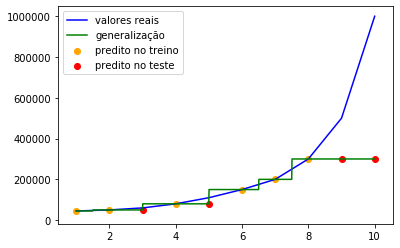

In [6]:
plt.plot(X,y, c='blue', label = 'valores reais');
plt.scatter(X_train, regressor.predict(X_train), c='orange', label = 'predito no treino');
x_list = np.arange(X.values.min(), X.values.max(), (X.values.max() - X.values.min())/1000)
plt.scatter(X_test, regressor.predict(X_test), c='red', label = 'predito no teste');
plt.plot(x_list, regressor.predict(x_list.reshape(-1,1)), c='green', label='generalização')
plt.legend()

In [15]:
results =model_functions.metrics(regressor, 'regression', X_train, X_test, y_train, y_test)
pd.DataFrame(results)


### TREINO:###

explained_variance:  1.0
mean_squared_log_error:  0.0
MAE:  0.0
MSE:  0.0
RMSE:  0.0
Median Absolute Error:  0.0
r2:  1.0

### TESTE:###

explained_variance:  0.4545
mean_squared_log_error:  0.4613
MAE:  235000.0
MSE:  132750000000.0
RMSE:  603.6131
Median Absolute Error:  115000.0
r2:  0.0659


train             test
explained_variance  1.000            0.455
mslogerror          0.000            0.461
mae                 0.000       235000.000
mse                 0.000 132750000000.000
rmse                0.000       364348.734
median_abs_error    0.000       115000.000
r2                  1.000            0.066

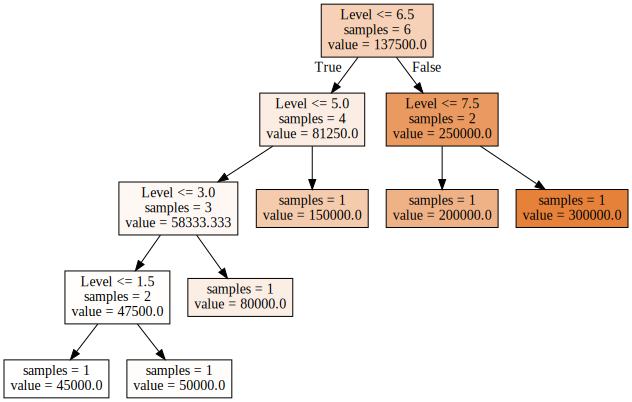

In [16]:
# Caso não foi adicionado no caminho do windows (variaveis de sistema)
# os.environ["PATH"] += os.pathsep + "C:\Program Files\Graphviz\bin"

export_graphviz(regressor, feature_names = X.columns, out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# CASE 1 - BOSTON DATASET

- Regression Tree em múltiplas dimensões

In [17]:
from sklearn.datasets import load_boston
load_df = load_boston()
dataset = pd.concat([pd.DataFrame(load_df.data,columns = load_df.feature_names)
                     ,pd.DataFrame(load_df.target,columns = ['target'])], axis=1)

In [18]:
dataset.head()

CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT  target  
0 396.900  4.980  24.000  
1 396.900  9.140  21.600  
2 392.830  4.030  34.700  
3 394.630  2.940  33.400  
4 396.900  5.330  36.200

Text(0.5, 1.0, 'Correlação com Target')

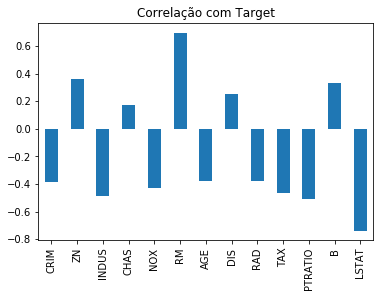

In [19]:
dataset.corr()['target'][:-1].plot(kind='bar')
plt.title('Correlação com Target')

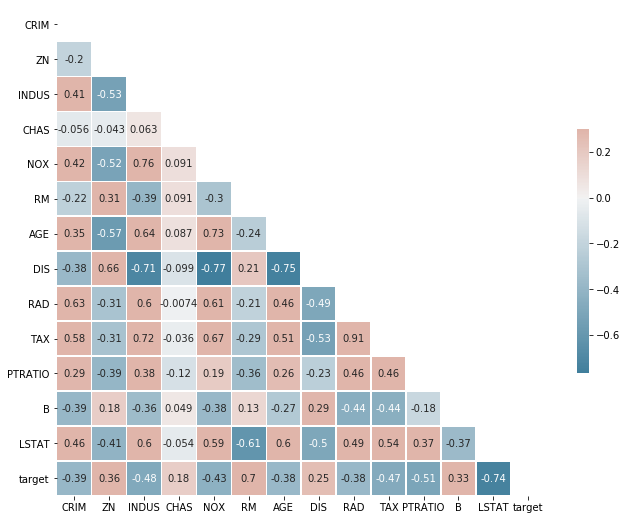

In [20]:
EDA.print_correlation_matrix(dataset)

In [21]:
# import numpy as np

# qt = {}
# for q_ in np.arange(0.2,1,0.05):
#     qt[round(q_,2)] = np.quantile(dataset['target'], round(q_,2))
    
# def retrieve_quantile(x, qt):
#     for i in range len(qt.keys()):
#         if qt[i]<x and x>qt[i]:
            
    
# retrieve_quantile(dataset['target'], qt)

# dataset['target'].hist()
# plt.axvline(x=qt[0.25], c='black')
# plt.axvline(x=qt[0.5], c='black')
# plt.axvline(x=qt[0.75], c='black')
# plt.axvline(x=qt[0.95], c='black')

In [22]:
X_train, X_test, y_train, y_test= train_test_split(dataset.drop(columns = 'target'),
                                                   dataset['target'],
                                                   test_size=1/3, 
                                                   random_state=seed)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(337, 13)
y_train shape:(337,)
X_test shape:(169, 13)
y_test shape:(169,)


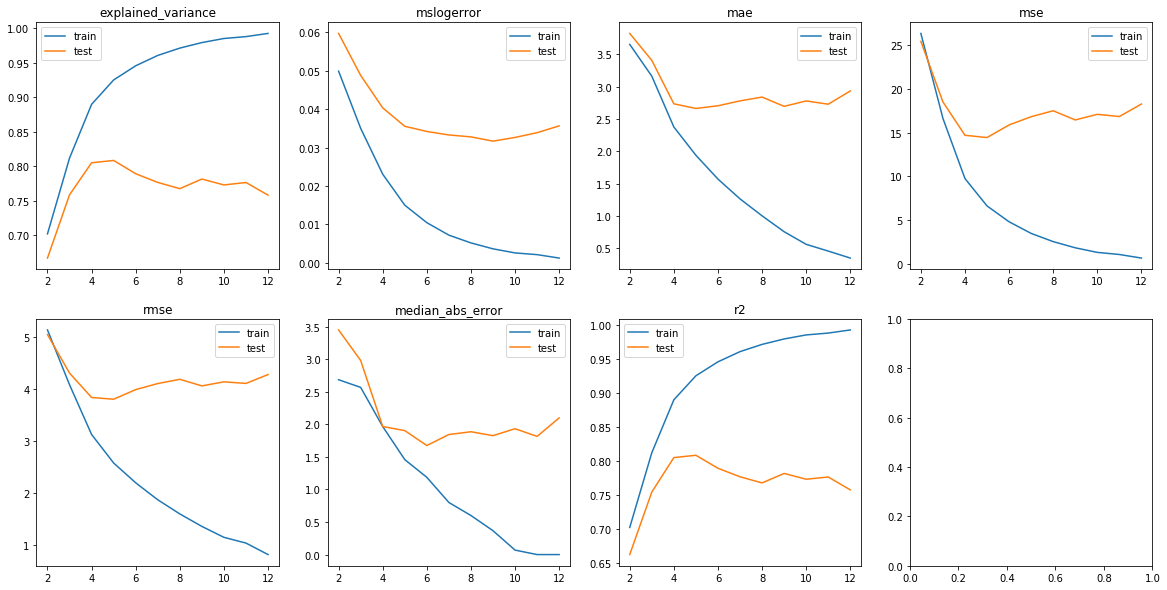

In [24]:
fig, axis = plt.subplots(2,4, figsize=(20,10))

for metrics_,axis_ in zip(['explained_variance', 'mslogerror', 'mae', 'mse', 'rmse', 'median_abs_error', 'r2'],
                          axis.ravel()):

    metrics={}

    for depth in np.arange(2,X_train.shape[1]):
        regressor = DecisionTreeRegressor(max_depth = depth, random_state=seed)
        regressor.fit(X_train, y_train)
        results =model_functions.metrics(regressor, 'regression', X_train, X_test, y_train, y_test, verbose=False)
        metrics[depth] = pd.DataFrame(results).loc[metrics_].to_dict()
    
    metrics_i = pd.DataFrame(metrics).T   
    metrics_i.plot(kind='line', ax=axis_);
    axis_.set_title(metrics_)

In [25]:
regressor = DecisionTreeRegressor(max_depth = 4, random_state=seed)
regressor.fit(X_train, y_train)

print('Training set score:{:.3f}\nTest set score:{:.3f}'
      .format(regressor.score(X_train, y_train),regressor.score(X_test, y_test)))

Training set score:0.890
Test set score:0.805


In [26]:
# Printa feature importance da arvore
def plot_feature_importance(model, n_top=20):
    
    df_feature_importance = pd.DataFrame({'features': X_train.columns.to_list(),
                                          'feature importance':model.feature_importances_})
    df_feature_importance.set_index('features', inplace=True)
    df_feature_importance.sort_values(by = 'feature importance', ascending=True, inplace=True)
    df_feature_importance.tail(n_top).plot(kind='barh')
    plt.legend(loc='lower right')
    plt.show()

    return df_feature_importance

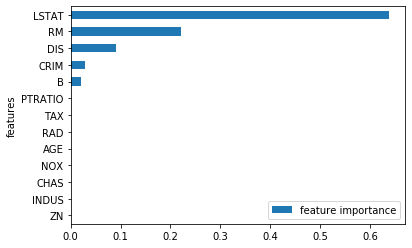

In [27]:
feature_imp = plot_feature_importance(regressor)

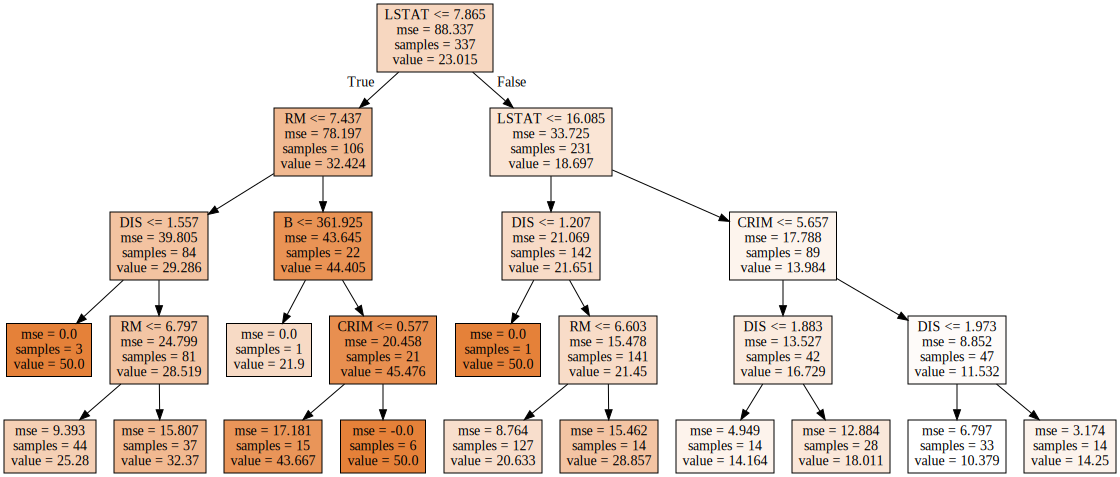

In [28]:
export_graphviz(regressor, feature_names = X_train.columns, out_file='tree.dot',impurity=True, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# # EXPORTA ARVORE
# dot_data = export_graphviz(regressor,
#                                 feature_names=X_train.columns,
#                                 out_file=None,
#                                 filled=True,
#                                 rounded=True)

# pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# pydot_graph.write_png('tree_export.png')
# pydot_graph.set_size('"5,5!"')
# pydot_graph.write_png('resized_tree.png')

In [29]:
# Usando somenta as duas principais variáveis

X_train, X_test, y_train, y_test= train_test_split(dataset[['LSTAT','RM']],
                                                   dataset['target'],
                                                   test_size=1/3, 
                                                   random_state=seed)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(337, 2)
y_train shape:(337,)
X_test shape:(169, 2)
y_test shape:(169,)


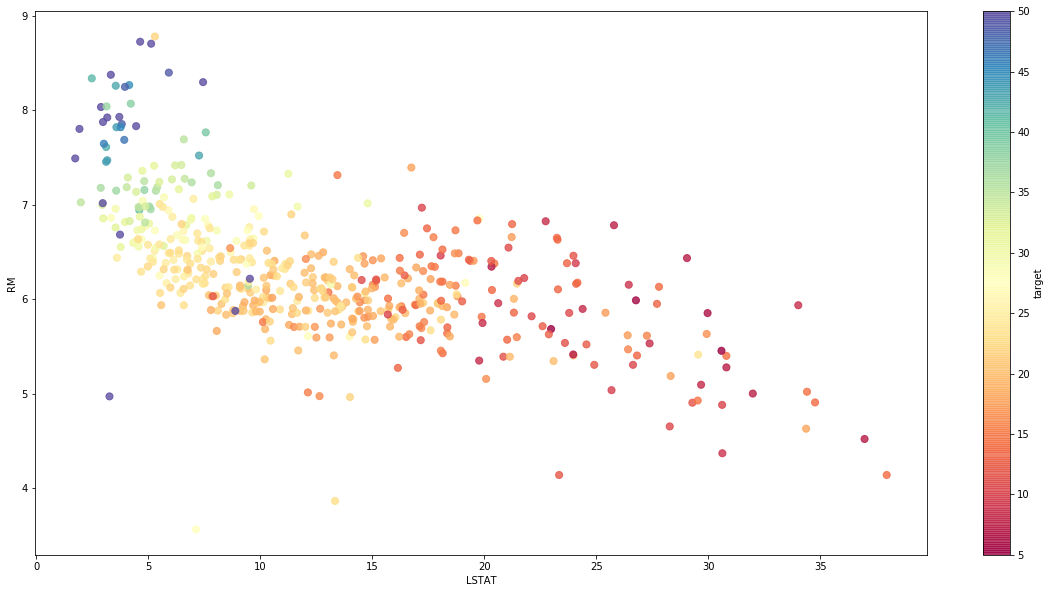

In [30]:
fig, axis = plt.subplots(1,1, figsize=(20,10))

dataset.plot(x = 'LSTAT', y ='RM', c='target', kind = 'scatter', cmap = 'Spectral', s=50, alpha =0.8, ax=axis)

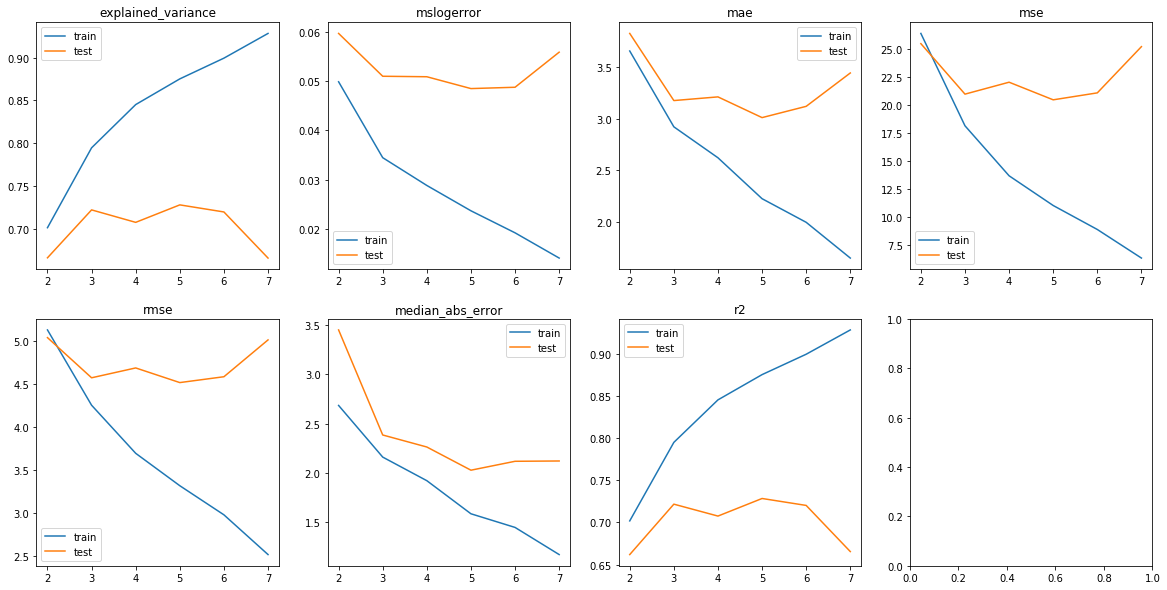

In [32]:
fig, axis = plt.subplots(2,4, figsize=(20,10))

for metrics_,axis_ in zip(['explained_variance', 'mslogerror', 'mae', 'mse', 'rmse', 'median_abs_error', 'r2'],
                          axis.ravel()):

    metrics={}

    for depth in np.arange(2,8):
        regressor = DecisionTreeRegressor(max_depth = depth, random_state=seed)
        regressor.fit(X_train, y_train)
        results =model_functions.metrics(regressor,'regression', X_train, X_test, y_train, y_test, verbose=False)
        metrics[depth] = pd.DataFrame(results).loc[metrics_].to_dict()
    
    metrics_i = pd.DataFrame(metrics).T   
    metrics_i.plot(kind='line', ax=axis_);
    axis_.set_title(metrics_)

In [33]:
regressor = DecisionTreeRegressor(max_depth = 3, random_state=seed)
regressor.fit(X_train, y_train)

print('Training set score:{:.3f}\nTest set score:{:.3f}'
      .format(regressor.score(X_train, y_train),regressor.score(X_test, y_test)))

Training set score:0.795
Test set score:0.722


In [34]:
r = export_text(regressor, feature_names=X_train.columns.to_list())
print(r)

|--- LSTAT <= 7.87
|   |--- RM <= 7.44
|   |   |--- RM <= 6.68
|   |   |   |--- value: [25.49]
|   |   |--- RM >  6.68
|   |   |   |--- value: [32.28]
|   |--- RM >  7.44
|   |   |--- RM <= 8.74
|   |   |   |--- value: [45.48]
|   |   |--- RM >  8.74
|   |   |   |--- value: [21.90]
|--- LSTAT >  7.87
|   |--- LSTAT <= 16.09
|   |   |--- RM <= 6.60
|   |   |   |--- value: [20.86]
|   |   |--- RM >  6.60
|   |   |   |--- value: [28.86]
|   |--- LSTAT >  16.09
|   |   |--- LSTAT <= 19.23
|   |   |   |--- value: [16.87]
|   |   |--- LSTAT >  19.23
|   |   |   |--- value: [12.12]



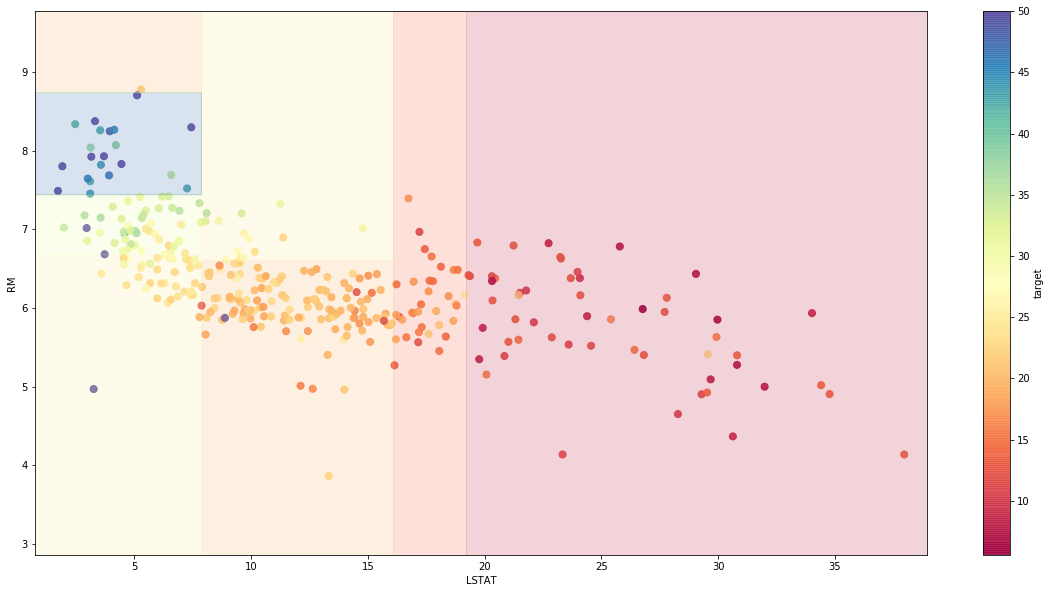

In [35]:
fig, axis = plt.subplots(1,1, figsize=(20,10))

X1, X2 = np.meshgrid(np.arange(start= X_train['LSTAT'].min() -1, stop= X_train['LSTAT'].max() +1, step = 0.01),
                     np.arange(start= X_train['RM'].min()-1, stop= X_train['RM'].max() +1, step = 0.01))
predictions = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
train = pd.concat([X_train, y_train], axis=1)
train.plot(x = 'LSTAT', y ='RM', c='target', kind = 'scatter', cmap = 'Spectral', s=50, alpha =0.9, ax=axis)
axis.contourf(X1,X2, predictions, cmap = 'Spectral', alpha = 0.2)

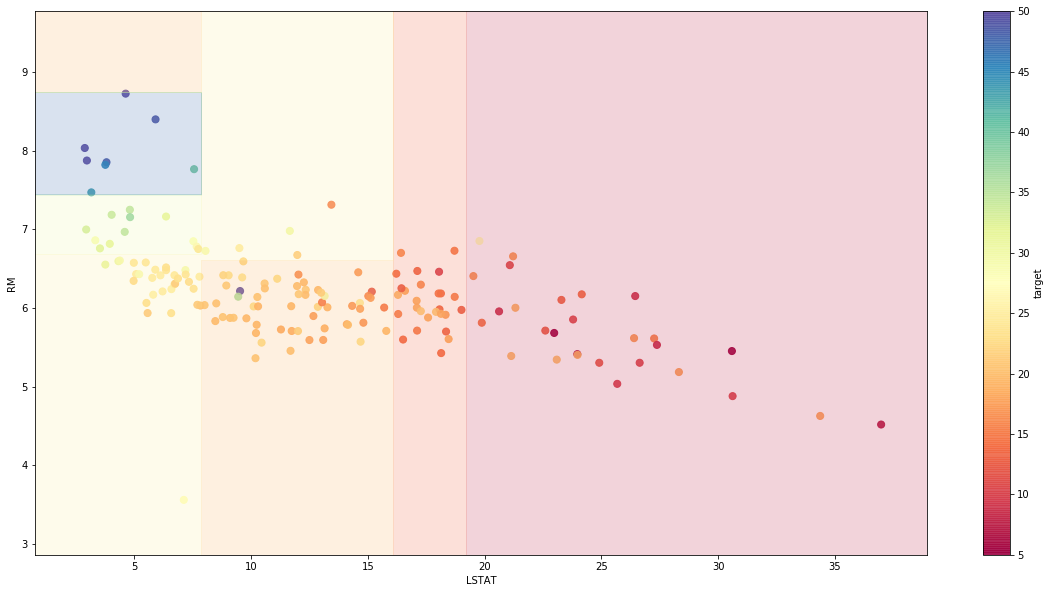

In [36]:
fig, axis = plt.subplots(1,1, figsize=(20,10))

X1, X2 = np.meshgrid(np.arange(start= X_train['LSTAT'].min() -1, stop= X_train['LSTAT'].max() +1, step = 0.01),
                     np.arange(start= X_train['RM'].min()-1, stop= X_train['RM'].max() +1, step = 0.01))
predictions = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
test = pd.concat([X_test, y_test], axis=1)
test.plot(x = 'LSTAT', y ='RM', c='target', kind = 'scatter', cmap = 'Spectral', s=50, alpha =0.9, ax=axis)
axis.contourf(X1,X2, predictions, cmap = 'Spectral', alpha = 0.2)

In [42]:
# Aplicando PCA e deixando somente as duas componentes principais

X_train, X_test, y_train, y_test= train_test_split(dataset.drop(columns = 'target'),
                                                   dataset['target'],
                                                   test_size=1/3, 
                                                   random_state=seed)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

from sklearn.preprocessing import MinMaxScaler

# Fitting to the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train[X_train.columns.to_list()] = scaler.transform(X_train)
X_test[X_train.columns.to_list()] = scaler.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA

n_components = 2
PCA=PCA(n_components=n_components)
columns_pca = ['PC'+str(i) for i in range(1,n_components+1) ]

X_train = pd.DataFrame(PCA.fit_transform(X_train), columns=columns_pca)
X_test =  pd.DataFrame(PCA.transform(X_test), columns=columns_pca)

X_train shape:(337, 13)
y_train shape:(337,)
X_test shape:(169, 13)
y_test shape:(169,)


In [43]:
print('Explained Variance :', PCA.explained_variance_)
print('Explained Variance Ratio:',PCA.explained_variance_ratio_)
print('Amount Explained:',PCA.explained_variance_ratio_.cumsum())

Explained Variance : [0.41422969 0.10370107]
Explained Variance Ratio: [0.51961625 0.13008426]
Amount Explained: [0.51961625 0.64970051]


In [44]:
regressor = DecisionTreeRegressor(max_depth = 3, random_state=seed)
regressor.fit(X_train, y_train)

print('Training set score:{:.3f}\nTest set score:{:.3f}'
      .format(regressor.score(X_train, y_train),regressor.score(X_test, y_test)))

Training set score:0.386
Test set score:0.366


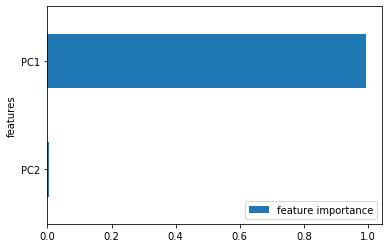

In [45]:
feature_imp = plot_feature_importance(regressor)

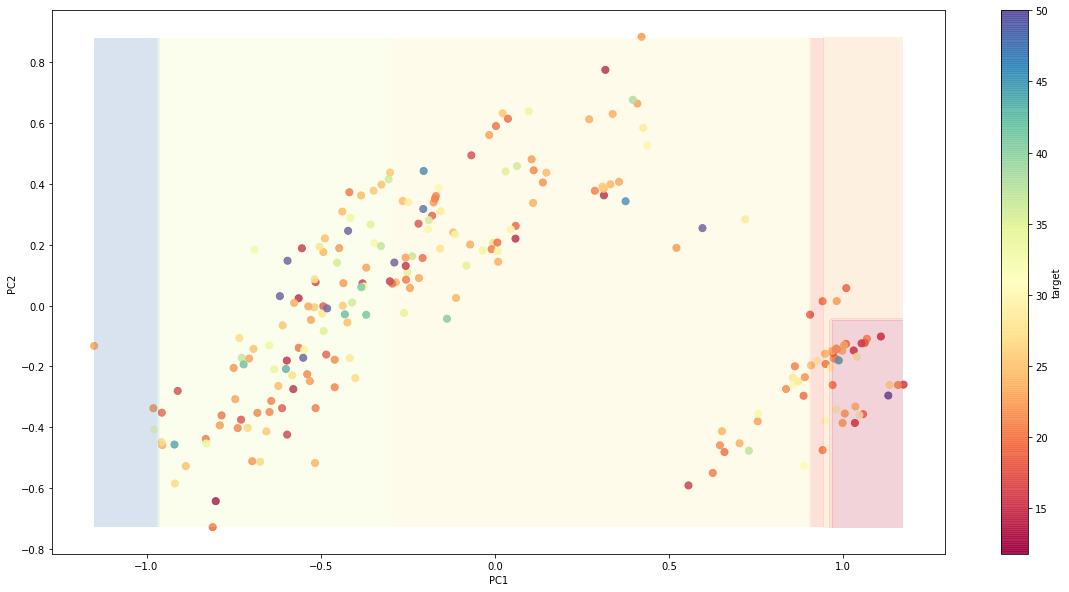

In [46]:
fig, axis = plt.subplots(1,1, figsize=(20,10))

X1, X2 = np.meshgrid(np.arange(start= X_train['PC1'].min(), stop= X_train['PC1'].max() , step = 0.01),
                     np.arange(start= X_train['PC2'].min(), stop= X_train['PC2'].max(), step = 0.01))
predictions = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
train = pd.concat([X_train, y_train], axis=1)
train.plot(x = 'PC1', y ='PC2', c='target', kind = 'scatter', cmap = 'Spectral', s=50, alpha =0.9, ax=axis)
axis.contourf(X1,X2, predictions, cmap = 'Spectral', alpha = 0.2)

# CASE 2 - House Pricing

In [47]:
train = pd.read_csv(r'..\Data\House Prices - Advanced Regression Techniques\train.csv')
test = pd.read_csv(r'..\Data\House Prices - Advanced Regression Techniques\test.csv')

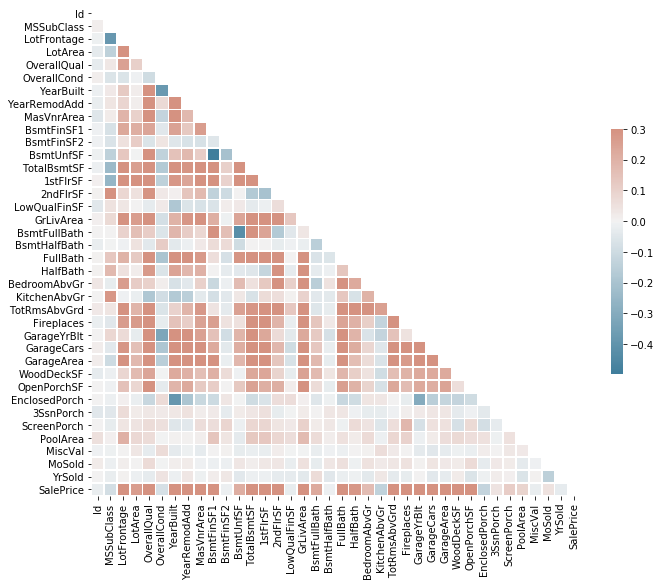

In [48]:
EDA.print_correlation_matrix(train, annot=False)

In [49]:
EDA.dataframe_description(train)

Tipo  Total de Missing  % de Missing    count unique  \
Id               int64                 0         0.000 1460.000    NaN   
MSSubClass       int64                 0         0.000 1460.000    NaN   
MSZoning        object                 0         0.000     1460      5   
LotFrontage    float64               259         0.177 1201.000    NaN   
LotArea          int64                 0         0.000 1460.000    NaN   
Street          object                 0         0.000     1460      2   
Alley           object              1369         0.938       91      2   
LotShape        object                 0         0.000     1460      4   
LandContour     object                 0         0.000     1460      4   
Utilities       object                 0         0.000     1460      2   
LotConfig       object                 0         0.000     1460      5   
LandSlope       object                 0         0.000     1460      3   
Neighborhood    object                 0         0.000     1460     25   
Condition1      object                 0         0.000     1460      9   
Condition2      object                 0         0.000     1460      8   
BldgType        object                 0         0.000     1460      5   
HouseStyle      object                 0         0.000     1460      8   
OverallQual      int64                 0         0.000 1460.000    NaN   
OverallCond      int64                 0         0.000 1460.000    NaN   
YearBuilt        int64                 0         0.000 1460.000    NaN   
YearRemodAdd     int64                 0         0.000 1460.000    NaN   
RoofStyle       object                 0         0.000     1460      6   
RoofMatl        object                 0         0.000     1460      8   
Exterior1st     object                 0         0.000     1460     15   
Exterior2nd     object                 0         0.000     1460     16   
MasVnrType      object                 8         0.005     1452      4   
MasVnrArea     float64                 8         0.005 1452.000    NaN   
ExterQual       object                 0         0.000     1460      4   
ExterCond       object                 0         0.000     1460      5   
Foundation      object                 0         0.000     1460      6   
BsmtQual        object                37         0.025     1423      4   
BsmtCond        object                37         0.025     1423      4   
BsmtExposure    object                38         0.026     1422      4   
BsmtFinType1    object                37         0.025     1423      6   
BsmtFinSF1       int64                 0         0.000 1460.000    NaN   
BsmtFinType2    object                38         0.026     1422      6   
BsmtFinSF2       int64                 0         0.000 1460.000    NaN   
BsmtUnfSF        int64                 0         0.000 1460.000    NaN   
TotalBsmtSF      int64                 0         0.000 1460.000    NaN   
Heating         object                 0         0.000     1460      6   
HeatingQC       object                 0         0.000     1460      5   
CentralAir      object                 0         0.000     1460      2   
Electrical      object                 1         0.001     1459      5   
1stFlrSF         int64                 0         0.000 1460.000    NaN   
2ndFlrSF         int64                 0         0.000 1460.000    NaN   
LowQualFinSF     int64                 0         0.000 1460.000    NaN   
GrLivArea        int64                 0         0.000 1460.000    NaN   
BsmtFullBath     int64                 0         0.000 1460.000    NaN   
BsmtHalfBath     int64                 0         0.000 1460.000    NaN   
FullBath         int64                 0         0.000 1460.000    NaN   
HalfBath         int64                 0         0.000 1460.000    NaN   
BedroomAbvGr     int64                 0         0.000 1460.000    NaN   
KitchenAbvGr     int64                 0         0.000 1460.000    NaN   
KitchenQual     object

In [50]:
EDA.dataframe_description(train).query('`% de Missing`>0')

Tipo  Total de Missing  % de Missing    count unique     top  \
LotFrontage   float64               259         0.177 1201.000    NaN     NaN   
Alley          object              1369         0.938       91      2    Grvl   
MasVnrType     object                 8         0.005     1452      4    None   
MasVnrArea    float64                 8         0.005 1452.000    NaN     NaN   
BsmtQual       object                37         0.025     1423      4      TA   
BsmtCond       object                37         0.025     1423      4      TA   
BsmtExposure   object                38         0.026     1422      4      No   
BsmtFinType1   object                37         0.025     1423      6     Unf   
BsmtFinType2   object                38         0.026     1422      6     Unf   
Electrical     object                 1         0.001     1459      5   SBrkr   
FireplaceQu    object               690         0.473      770      5      Gd   
GarageType     object                81         0.055     1379      6  Attchd   
GarageYrBlt   float64                81         0.055 1379.000    NaN     NaN   
GarageFinish   object                81         0.055     1379      3     Unf   
GarageQual     object                81         0.055     1379      5      TA   
GarageCond     object                81         0.055     1379      5      TA   
PoolQC         object              1453         0.995        7      3      Gd   
Fence          object              1179         0.808      281      4   MnPrv   
MiscFeature    object              1406         0.963       54      4    Shed   

              freq     mean     std      min      25%      50%      75%  \
LotFrontage    NaN   70.050  24.285   21.000   59.000   69.000   80.000   
Alley           50      NaN     NaN      NaN      NaN      NaN      NaN   
MasVnrType     864      NaN     NaN      NaN      NaN      NaN      NaN   
MasVnrArea     NaN  103.685 181.066    0.000    0.000    0.000  166.000   
BsmtQual       649      NaN     NaN      NaN      NaN      NaN      NaN   
BsmtCond      1311      NaN     NaN      NaN      NaN      NaN      NaN   
BsmtExposure   953      NaN     NaN      NaN      NaN      NaN      NaN   
BsmtFinType1   430      NaN     NaN      NaN      NaN      NaN      NaN   
BsmtFinType2  1256      NaN     NaN      NaN      NaN      NaN      NaN   
Electrical    1334      NaN     NaN      NaN      NaN      NaN      NaN   
FireplaceQu    380      NaN     NaN      NaN      NaN      NaN      NaN   
GarageType     870      NaN     NaN      NaN      NaN      NaN      NaN   
GarageYrBlt    NaN 1978.506  24.690 1900.000 1961.000 1980.000 2002.000   
GarageFinish   605      NaN     NaN      NaN      NaN      NaN      NaN   
GarageQual    1311      NaN     NaN      NaN      NaN      NaN      NaN   
GarageCond    1326      NaN     NaN      NaN      NaN      NaN      NaN   
PoolQC           3      NaN     NaN      NaN      NaN      NaN      NaN   
Fence          157      NaN     NaN      NaN      NaN      NaN      NaN   
MiscFeature     49      NaN     NaN      NaN      NaN      NaN      NaN   

                  max  
LotFrontage   313.000  
Alley             NaN  
MasVnrType        NaN  
MasVnrArea   1600.000  
BsmtQual          NaN  
BsmtCond          NaN  
BsmtExposure      NaN  
BsmtFinType1      NaN  
BsmtFinType2      NaN  
Electrical        NaN  
FireplaceQu       NaN  
GarageType        NaN  
GarageYrBlt  2010.000  
GarageFinish      NaN  
GarageQual        NaN  
GarageCond        NaN  
PoolQC            NaN  
Fence             NaN  
MiscFeature       NaN

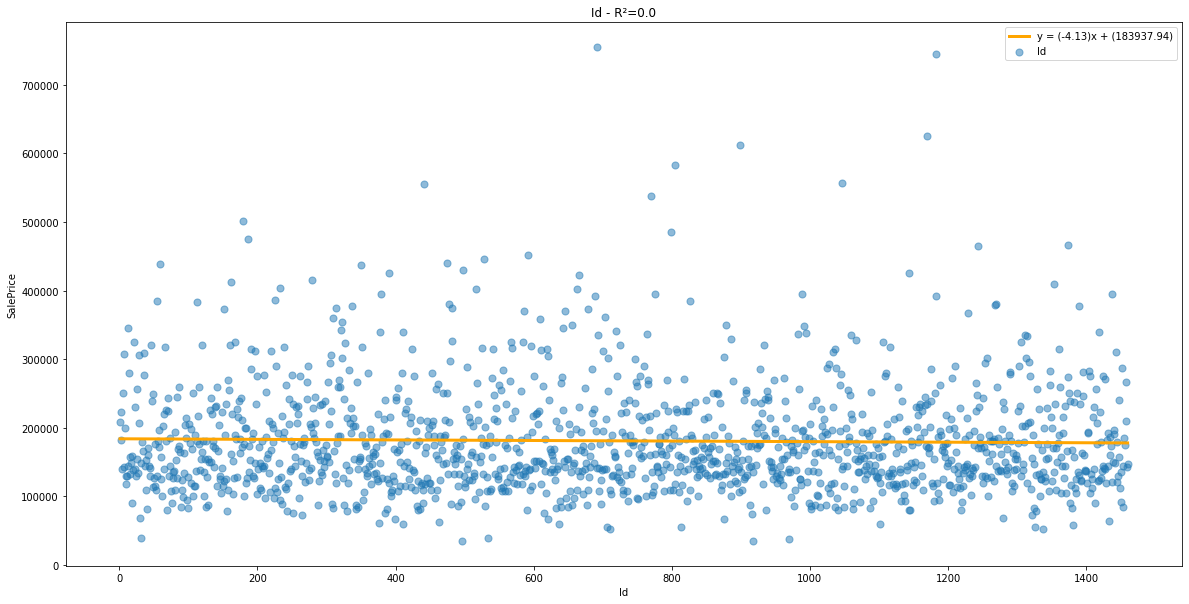

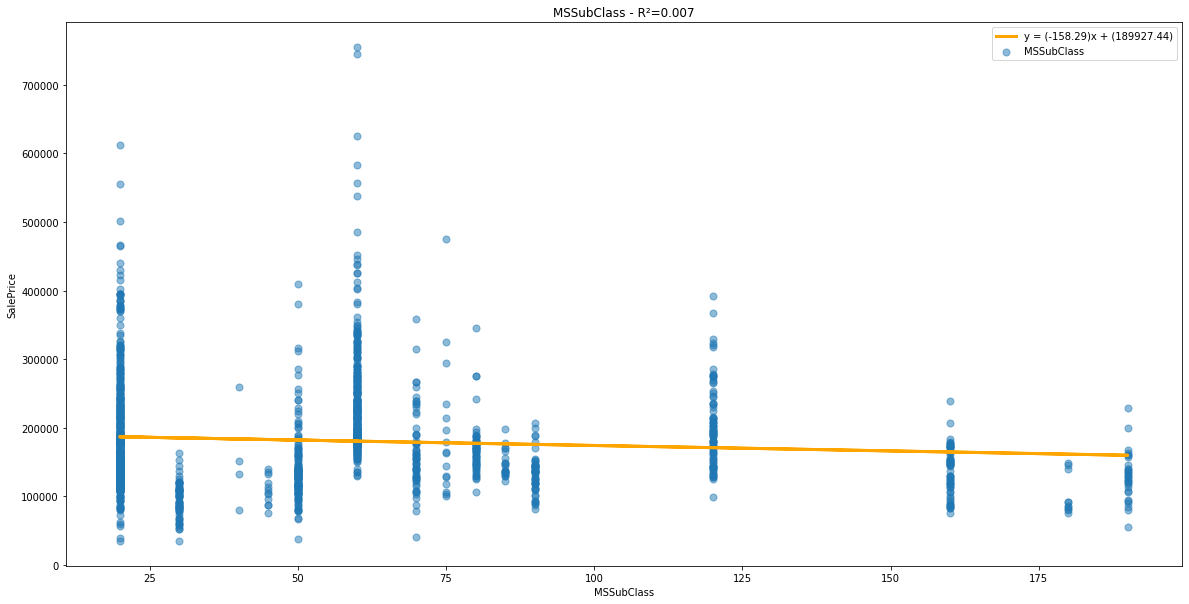

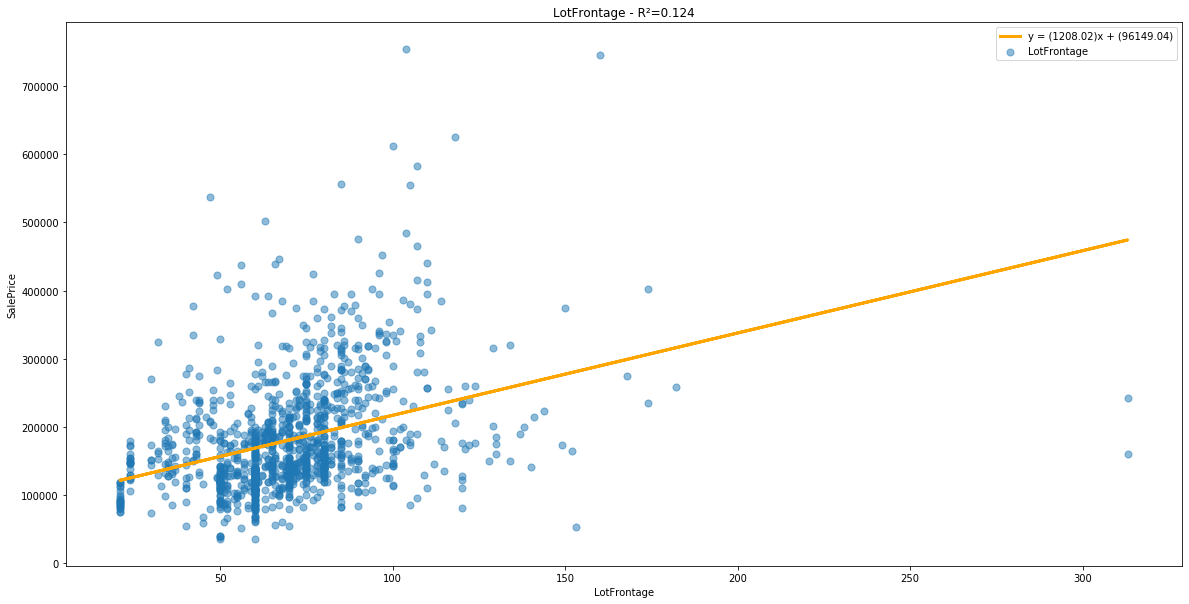

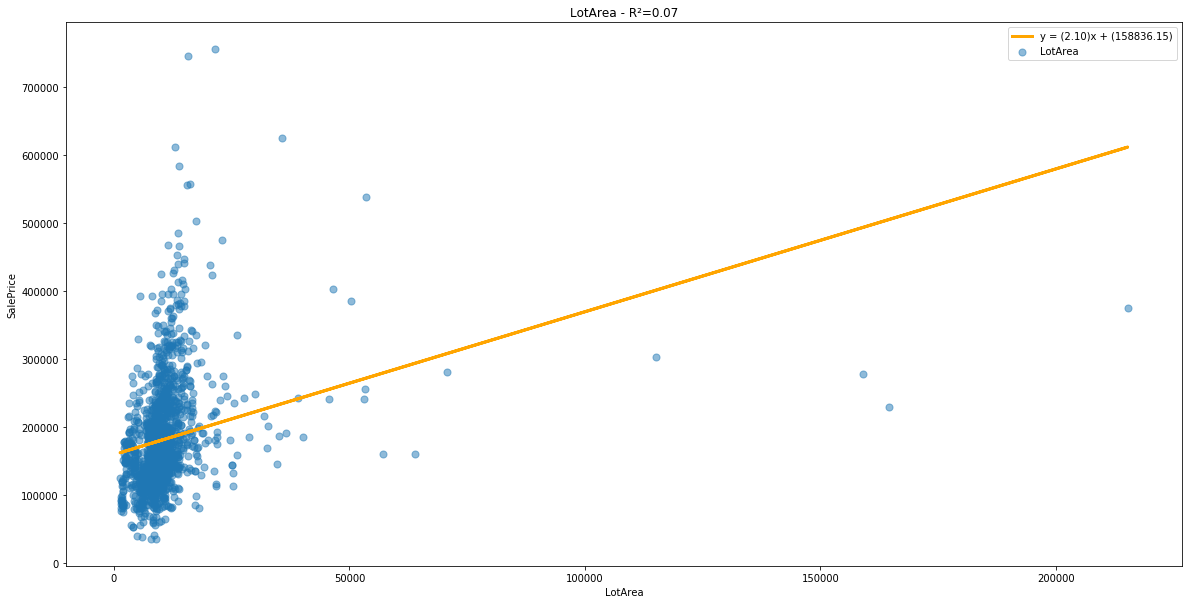

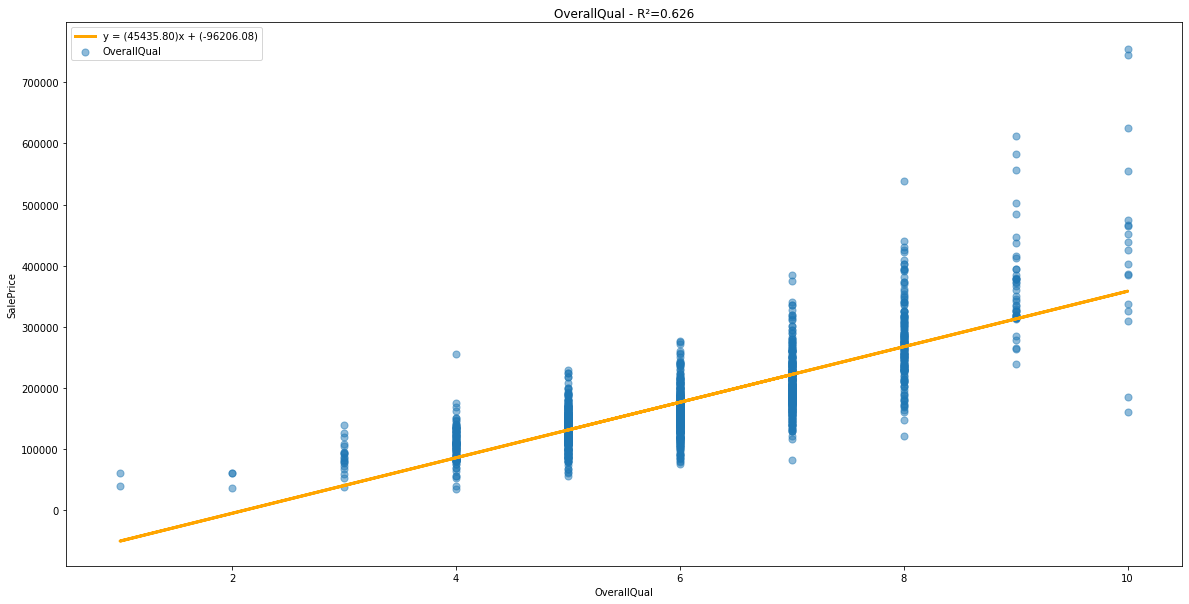

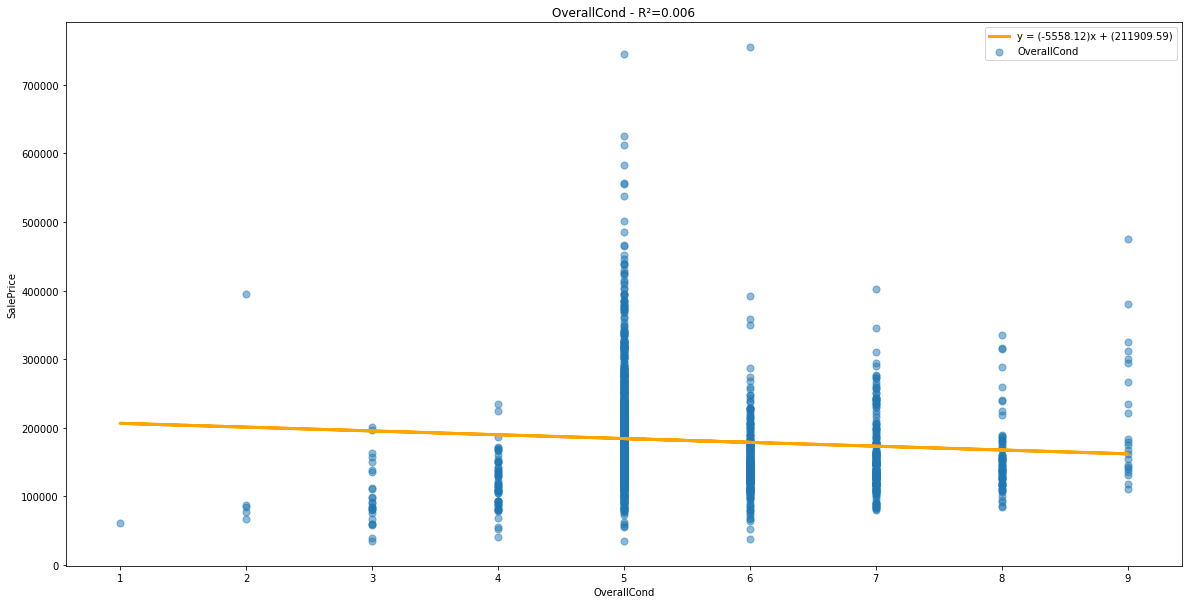

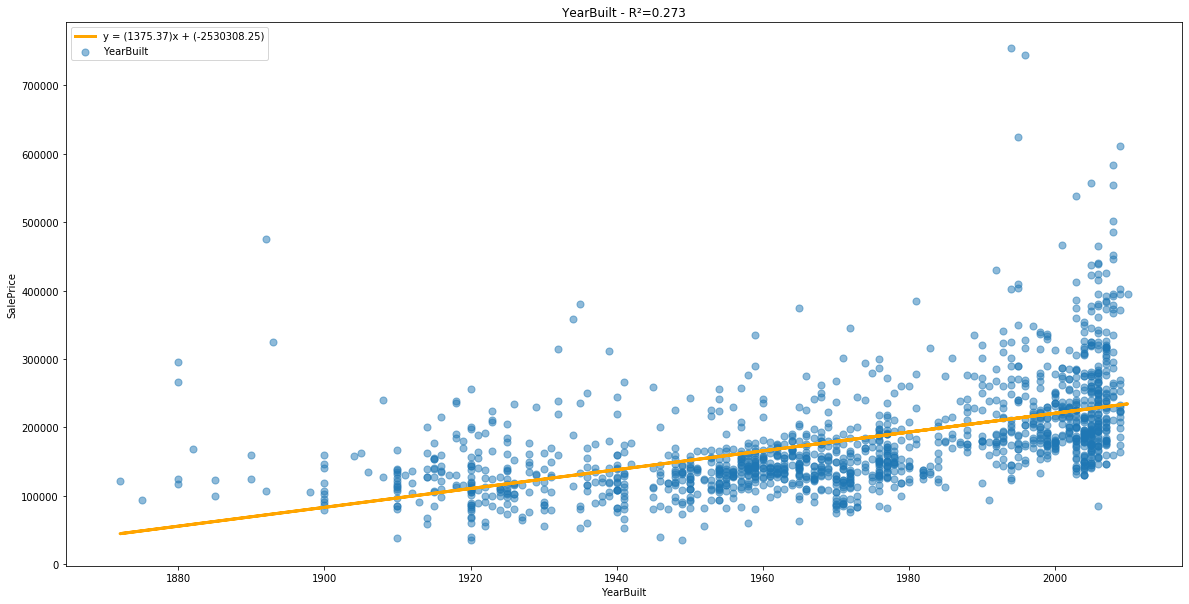

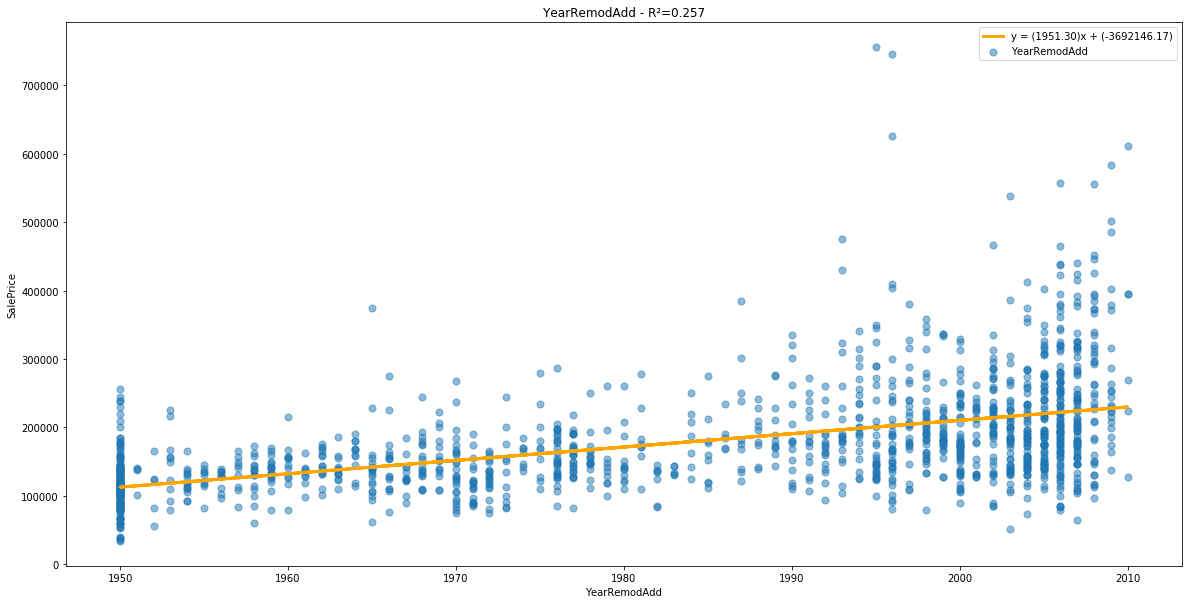

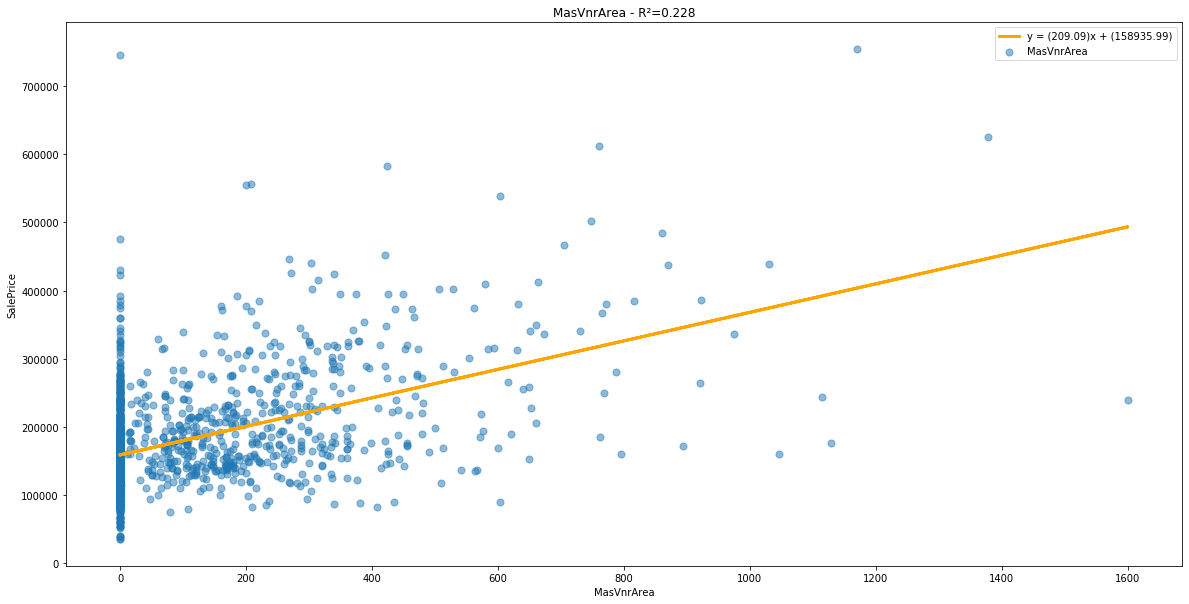

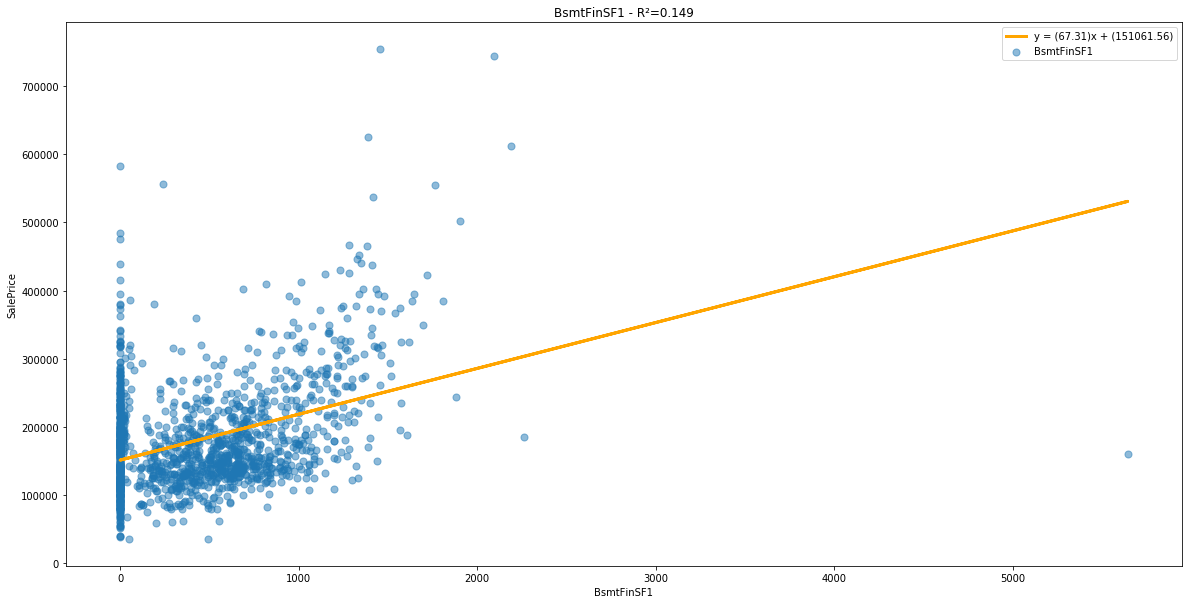

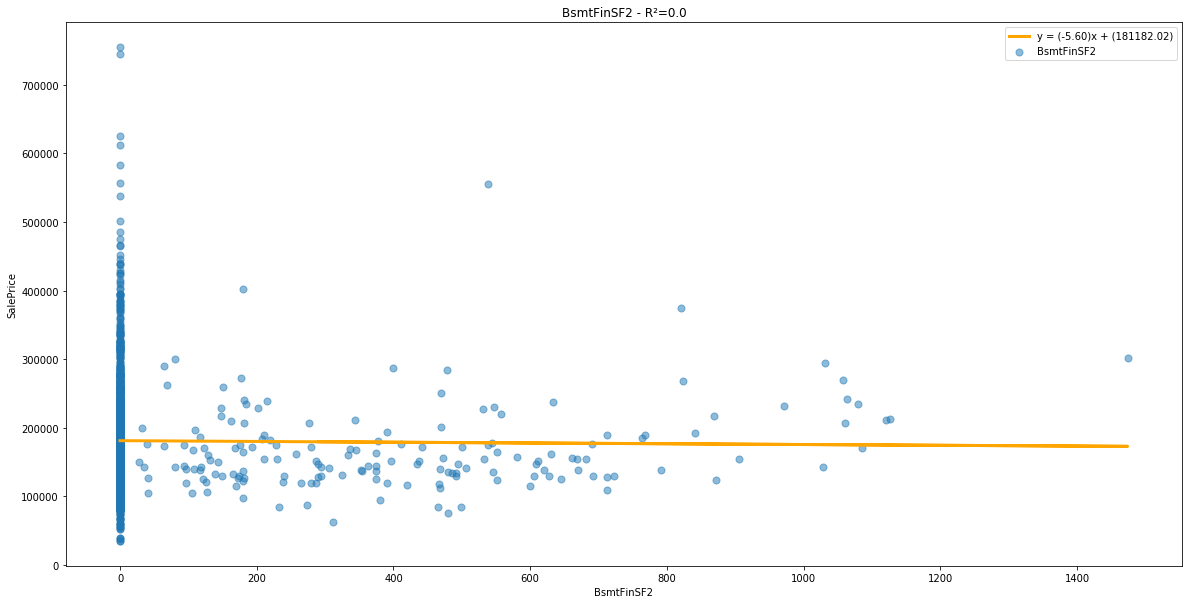

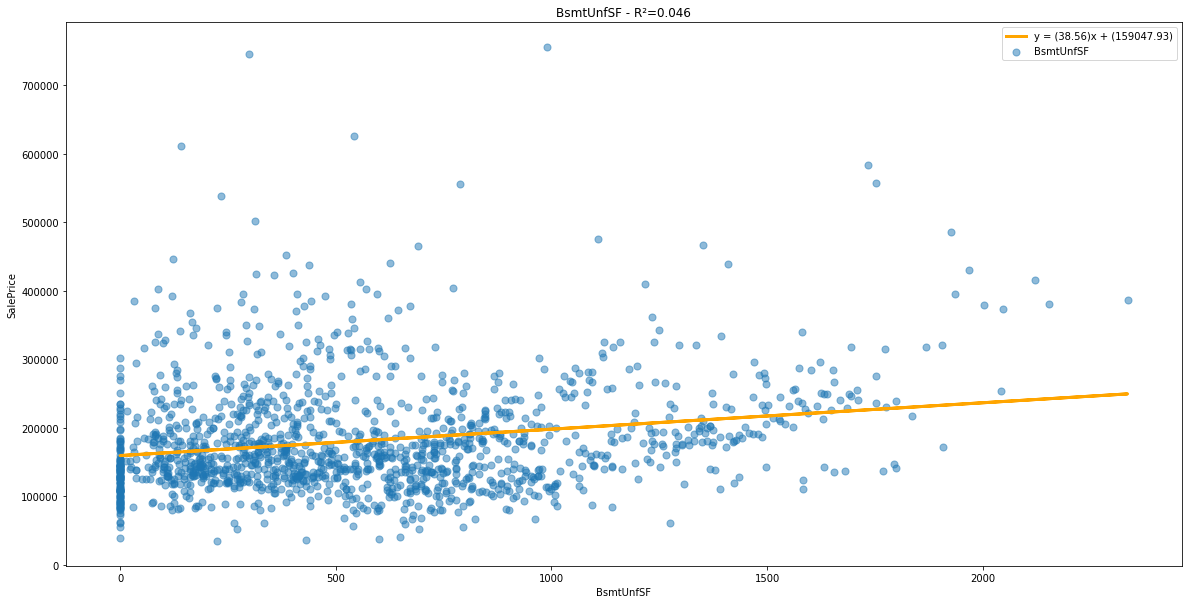

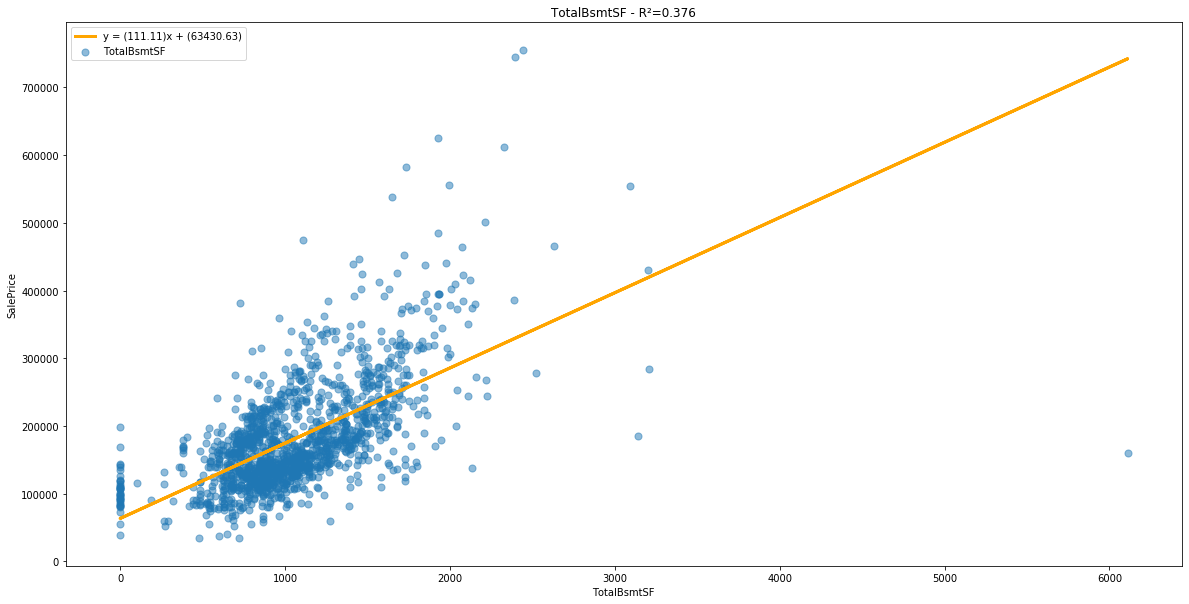

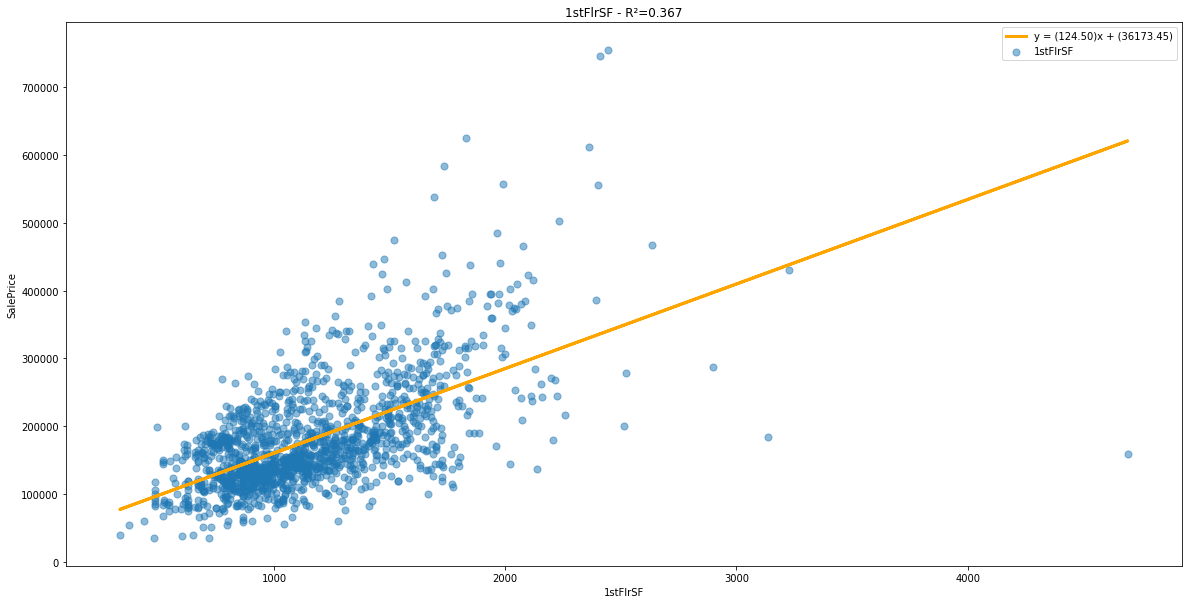

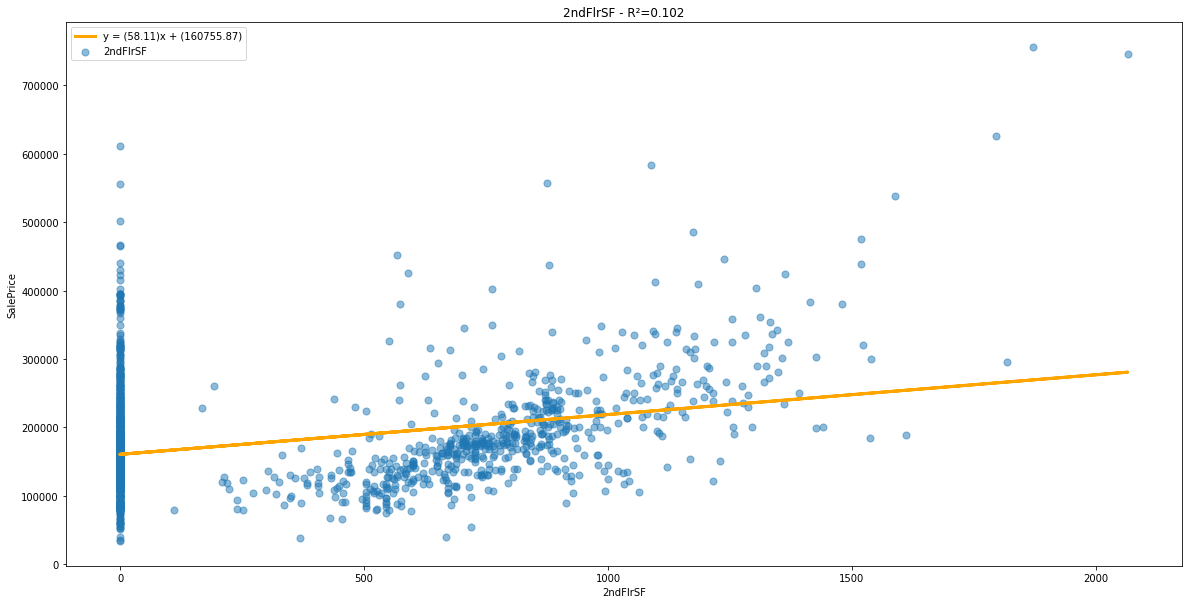

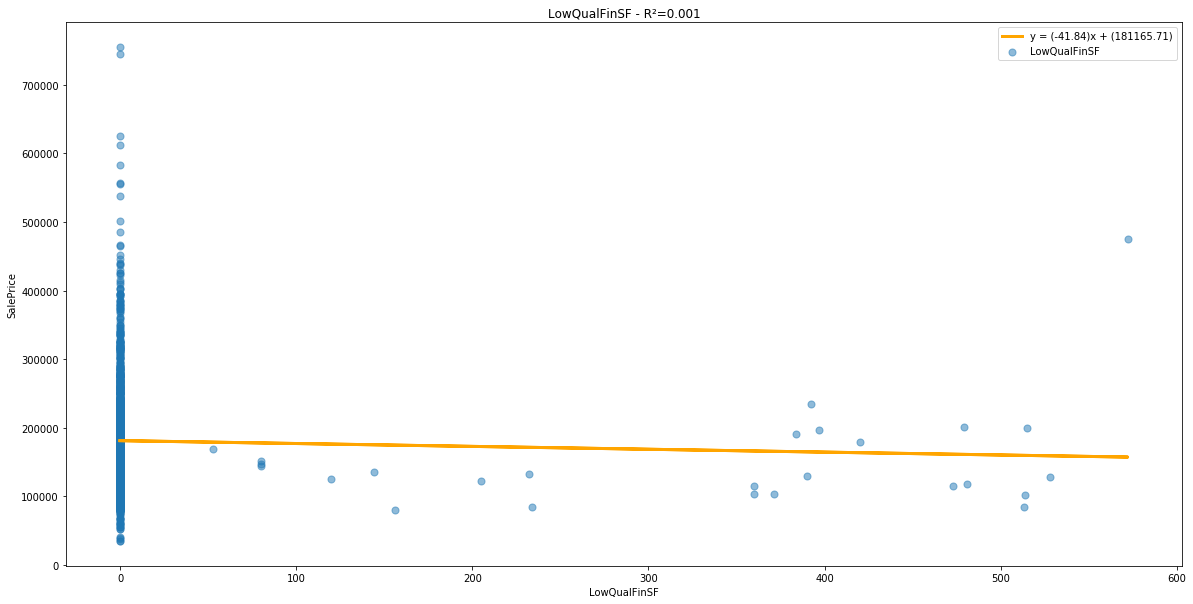

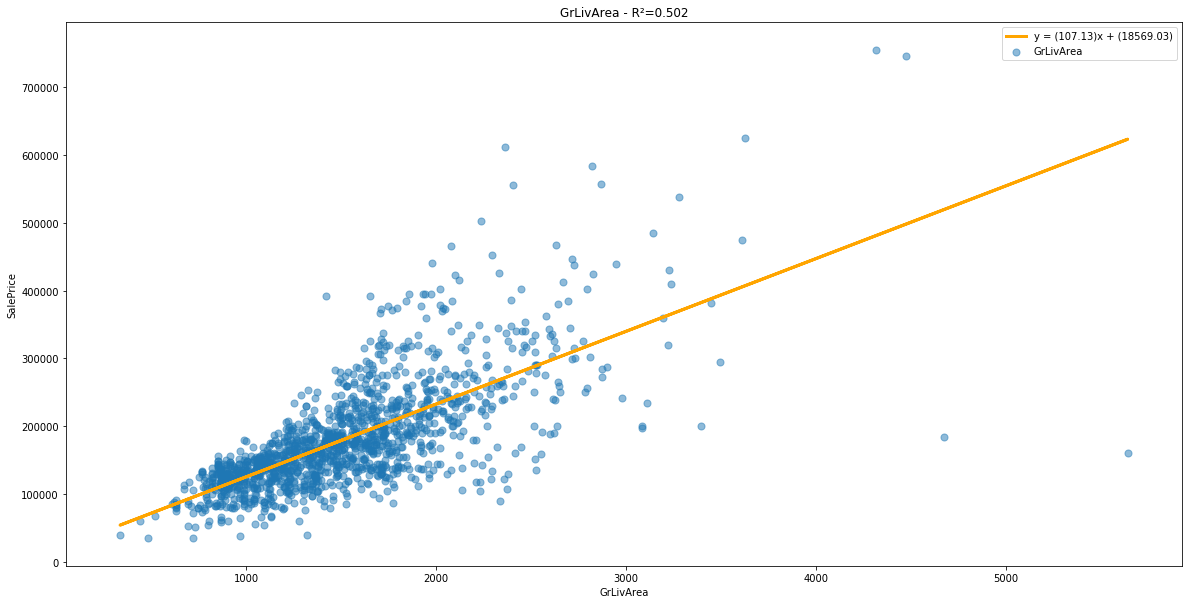

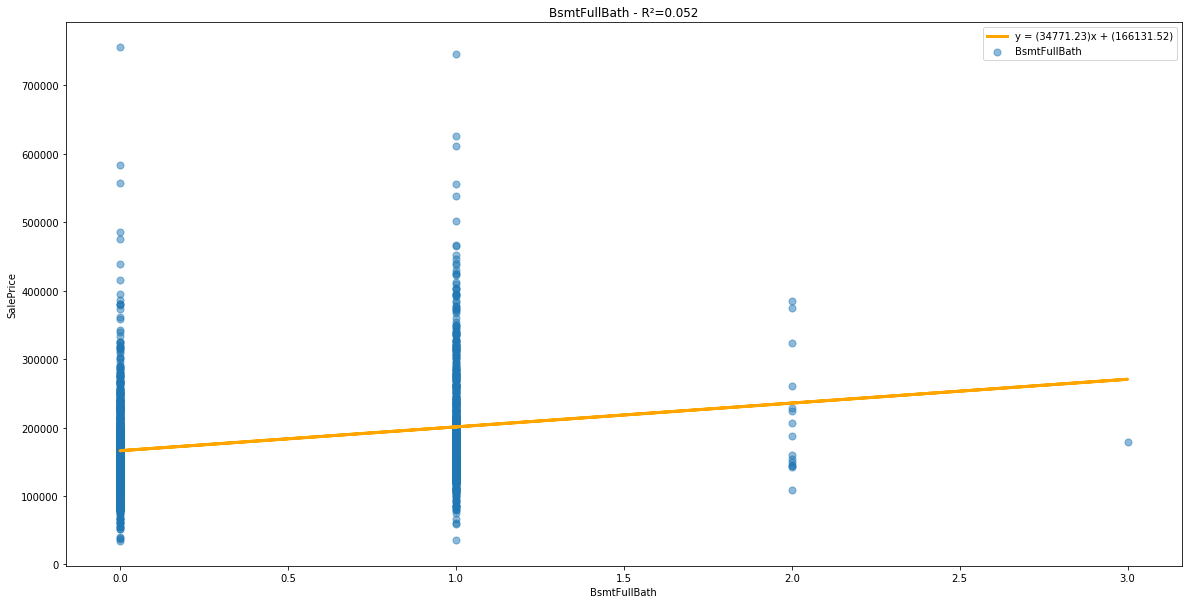

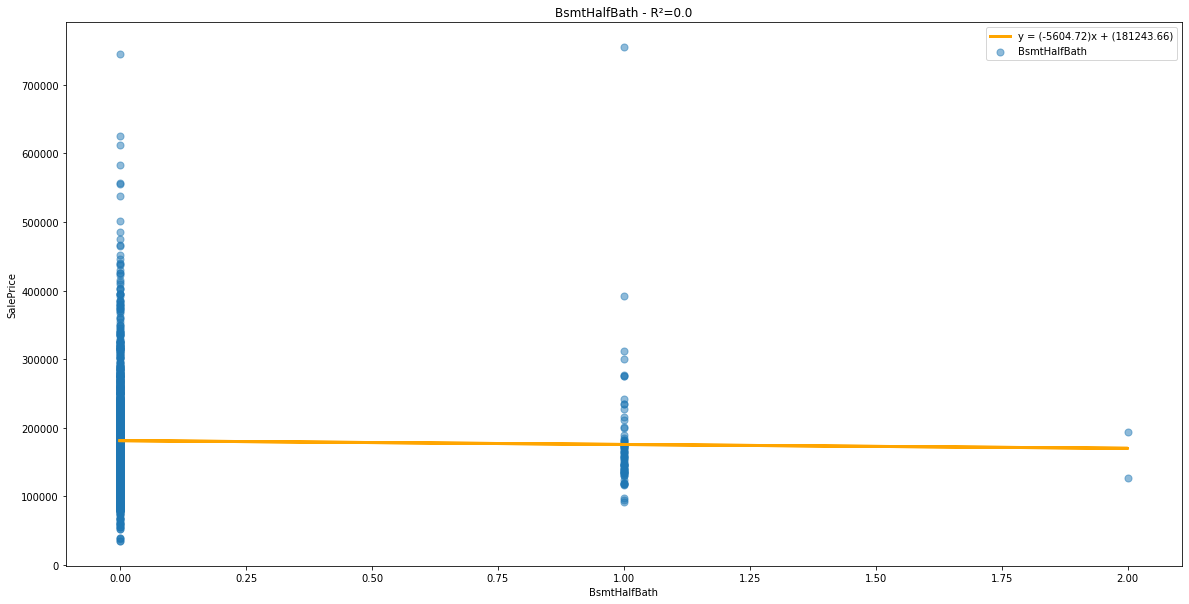

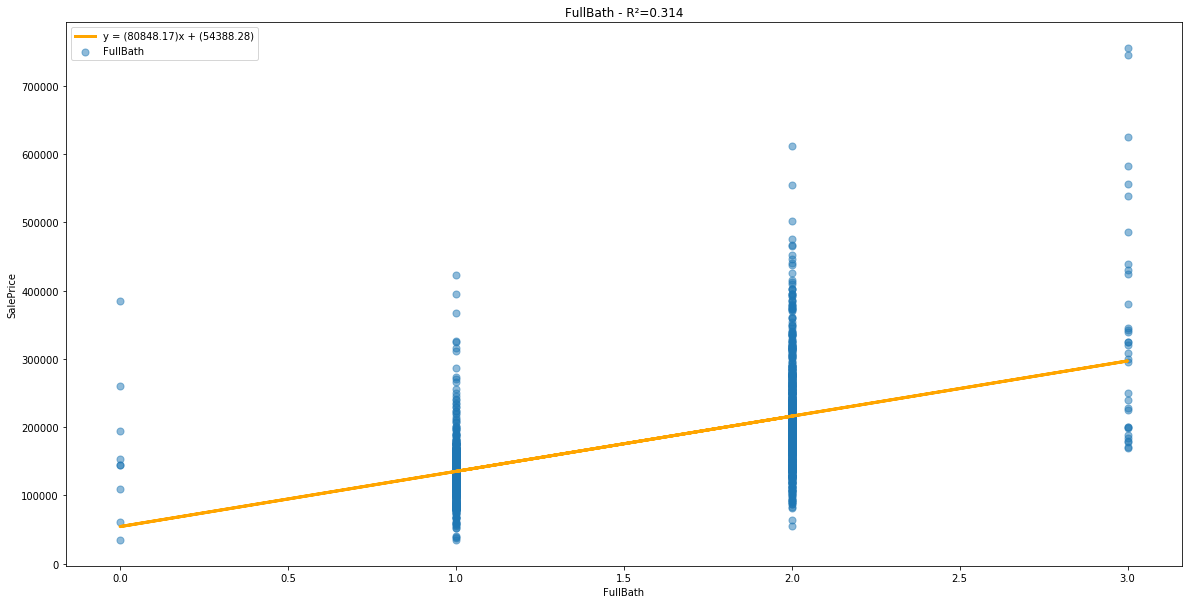

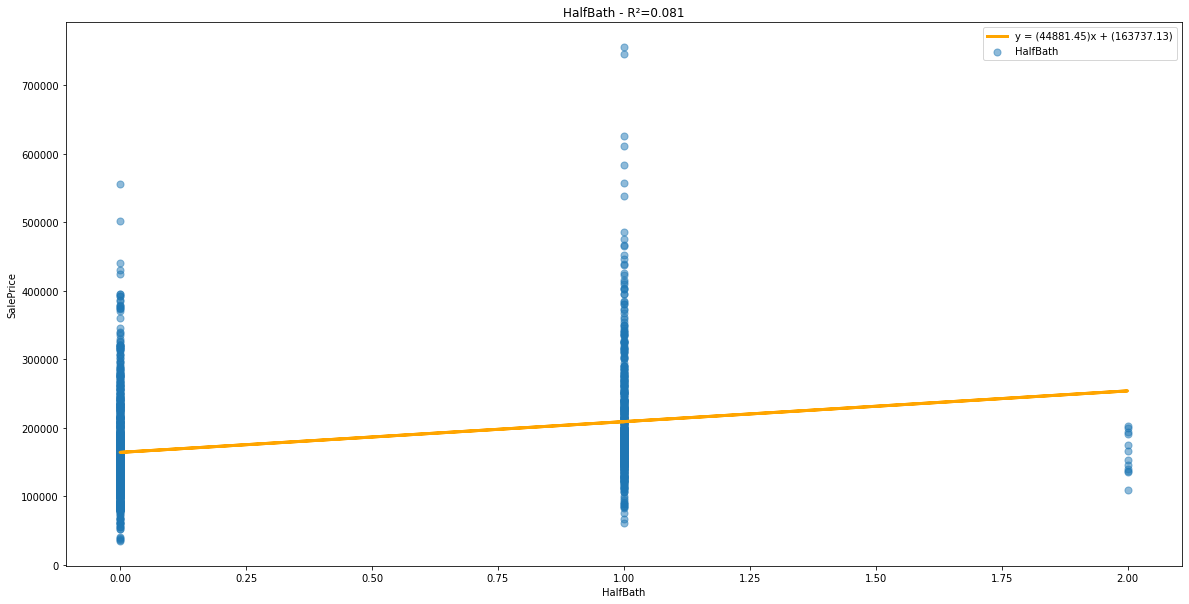

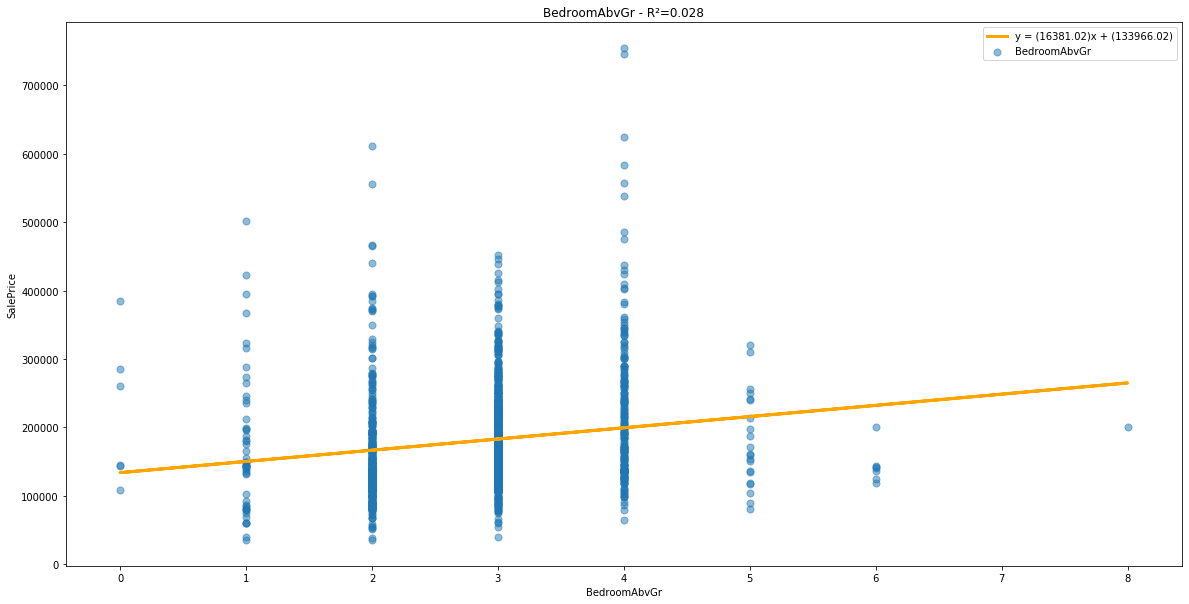

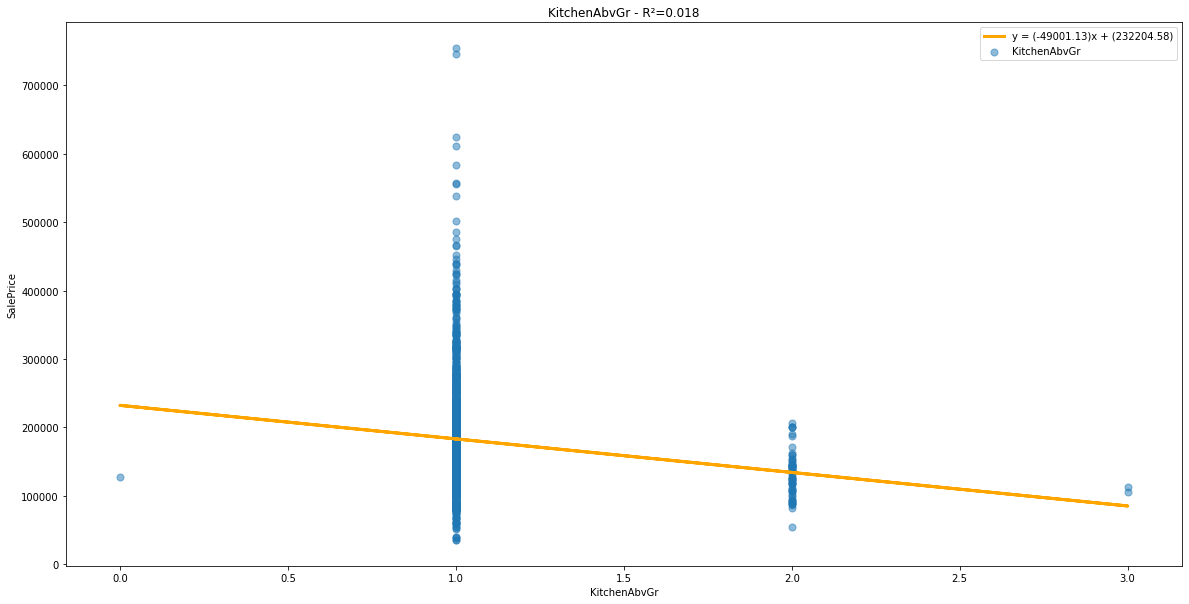

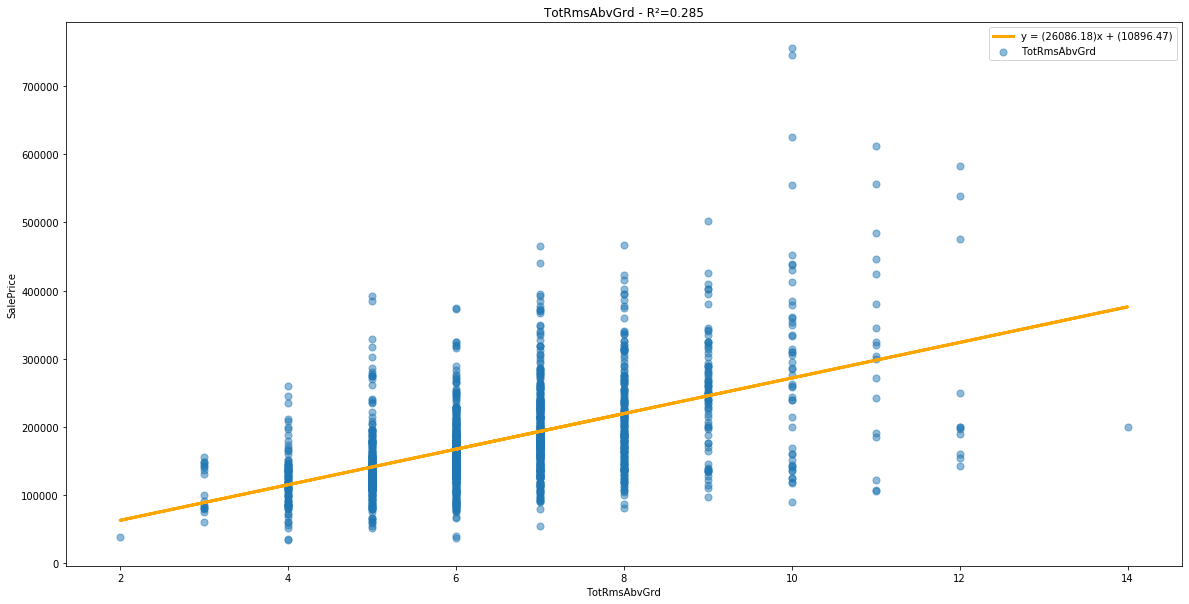

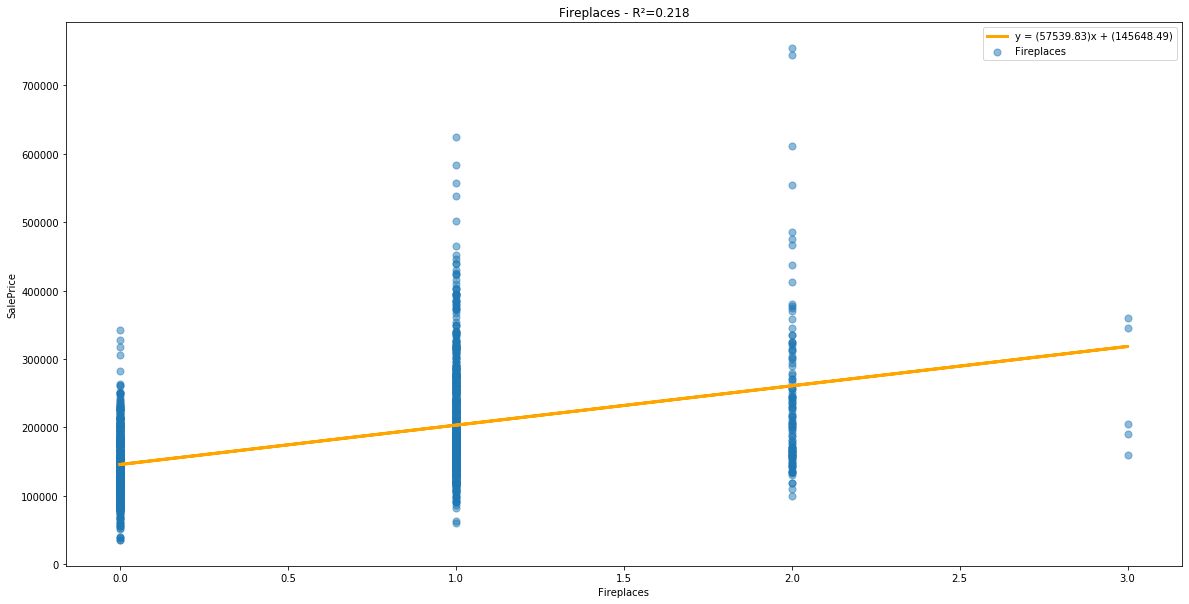

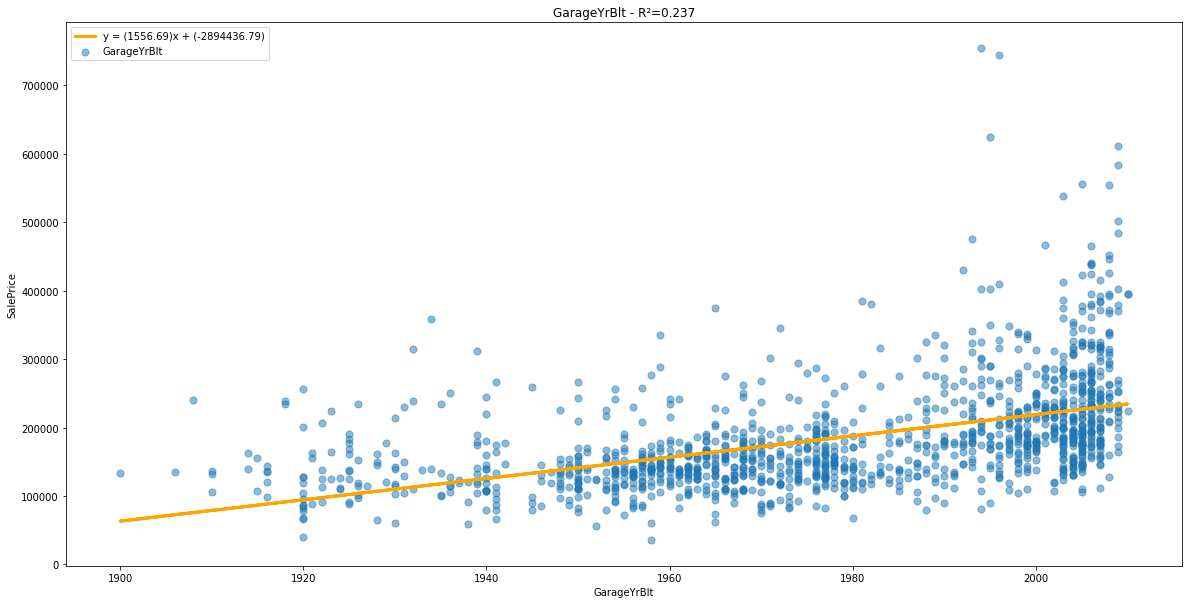

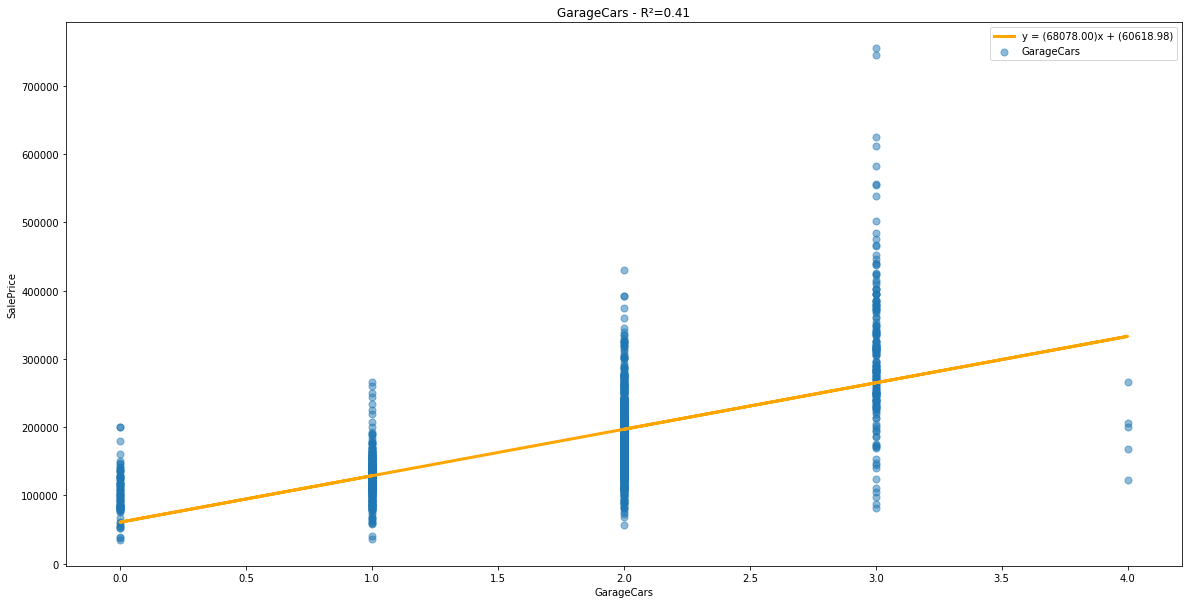

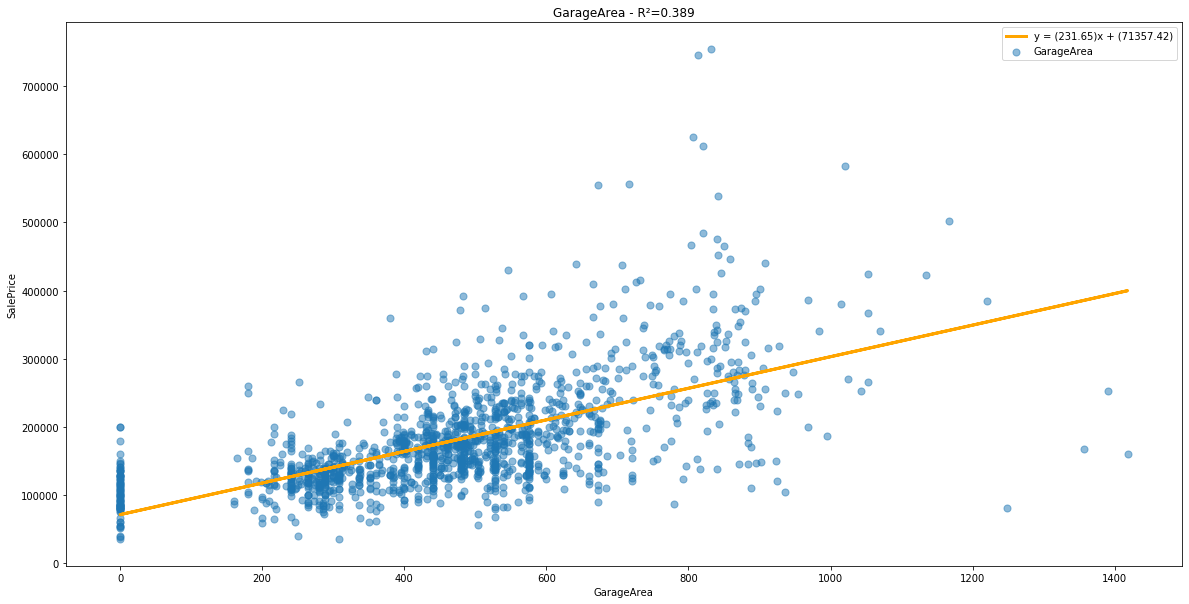

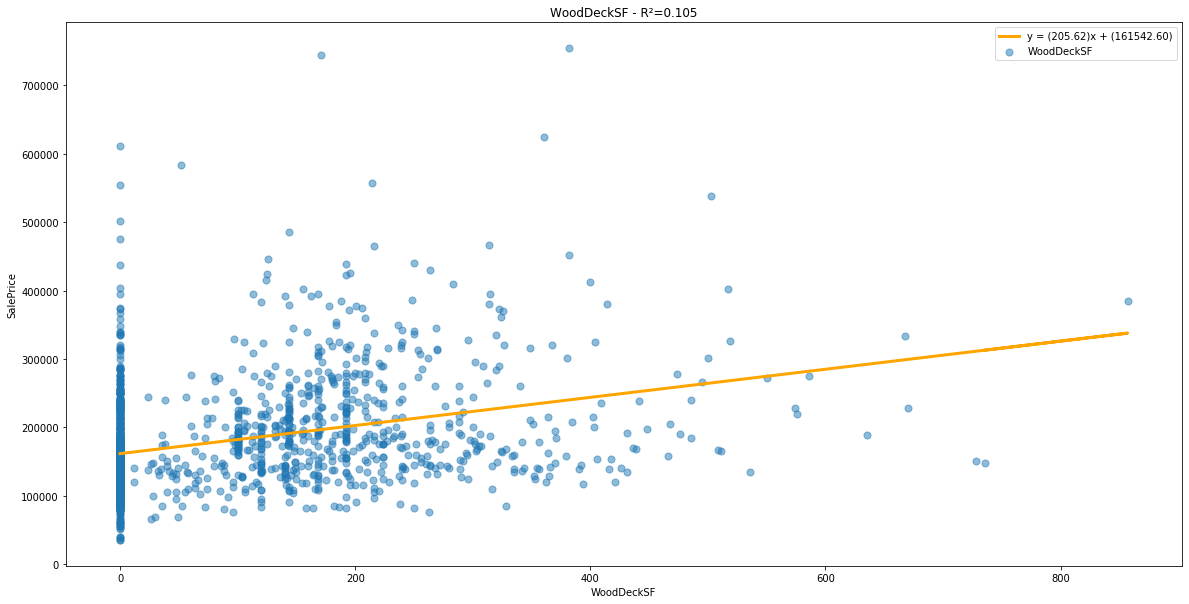

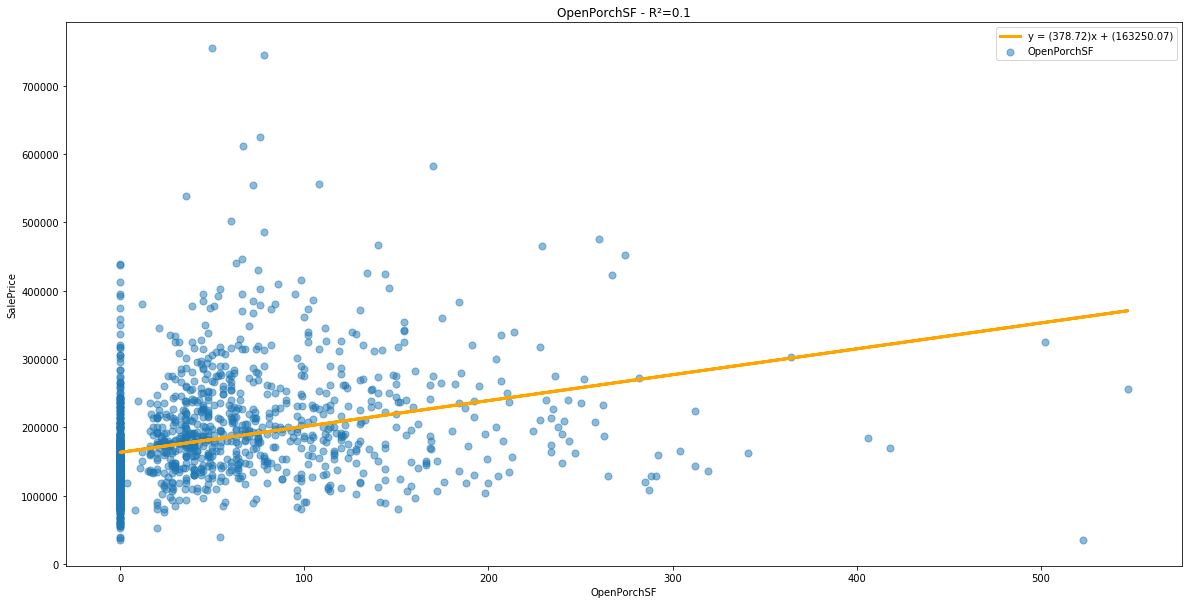

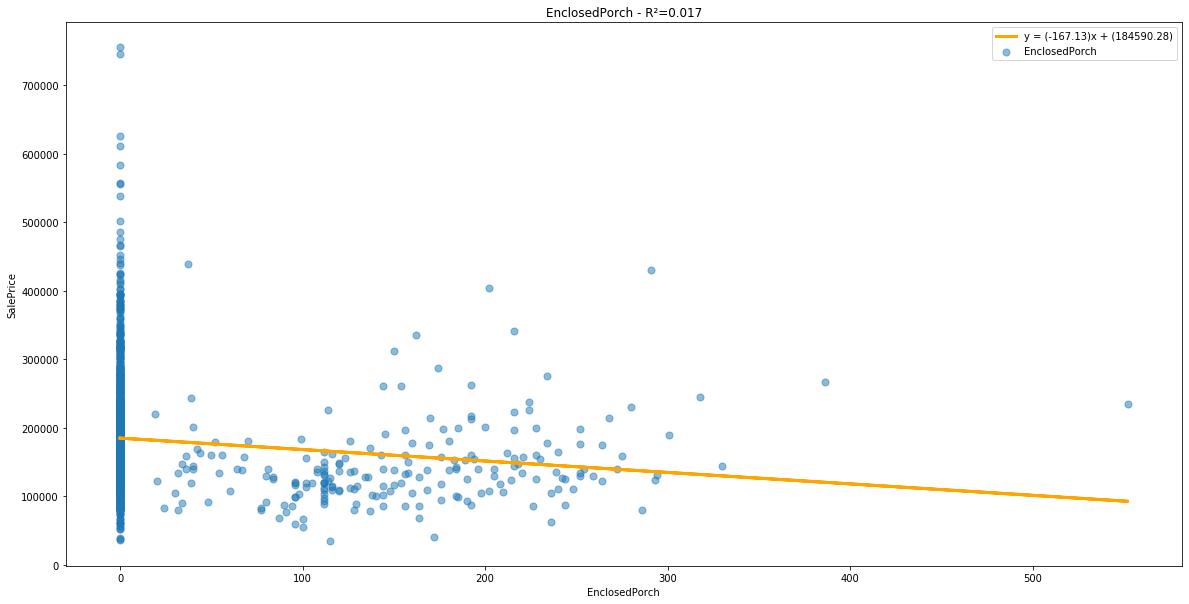

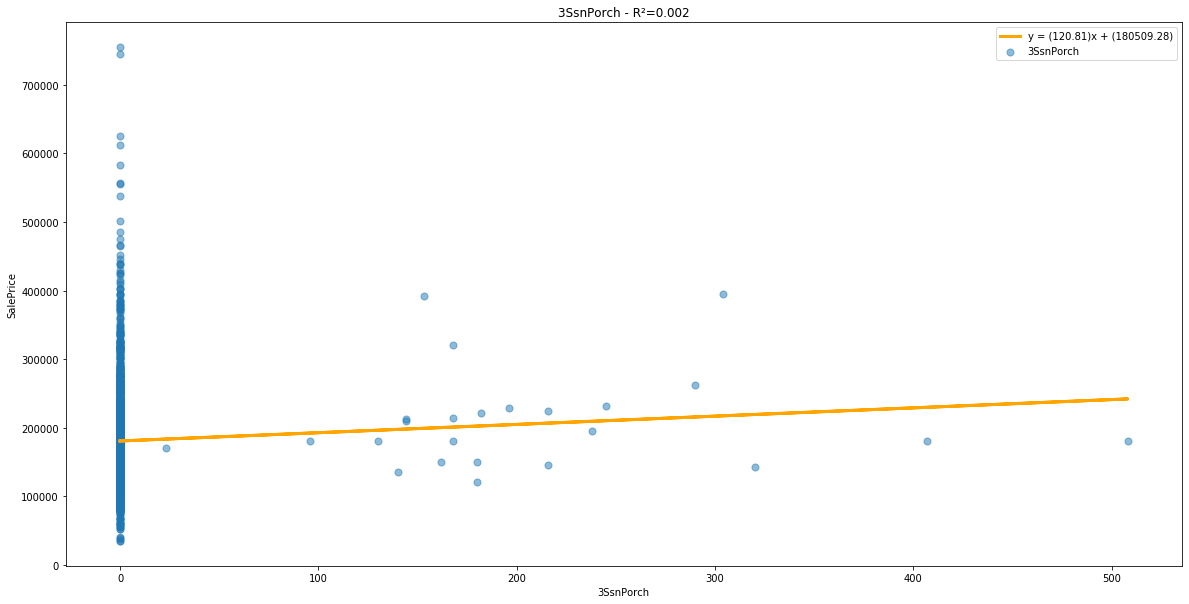

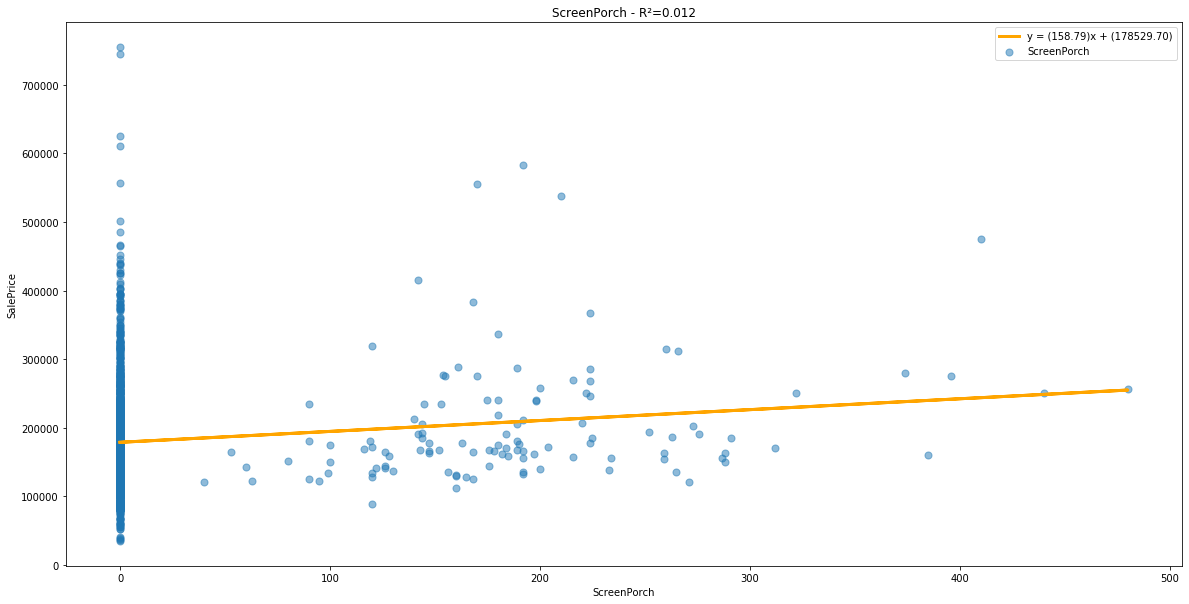

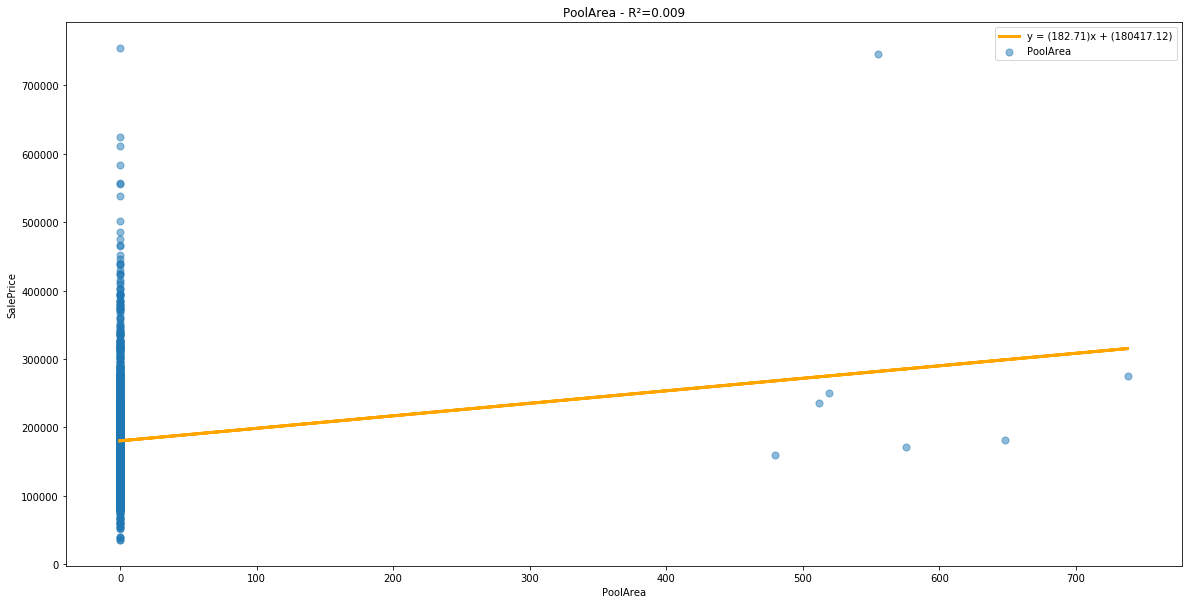

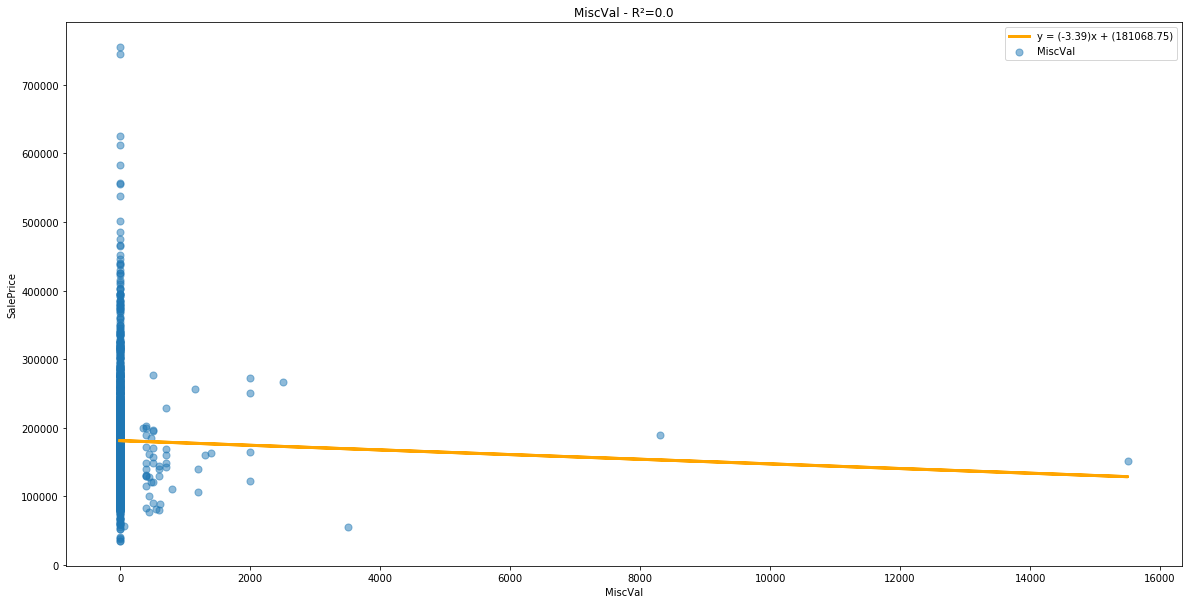

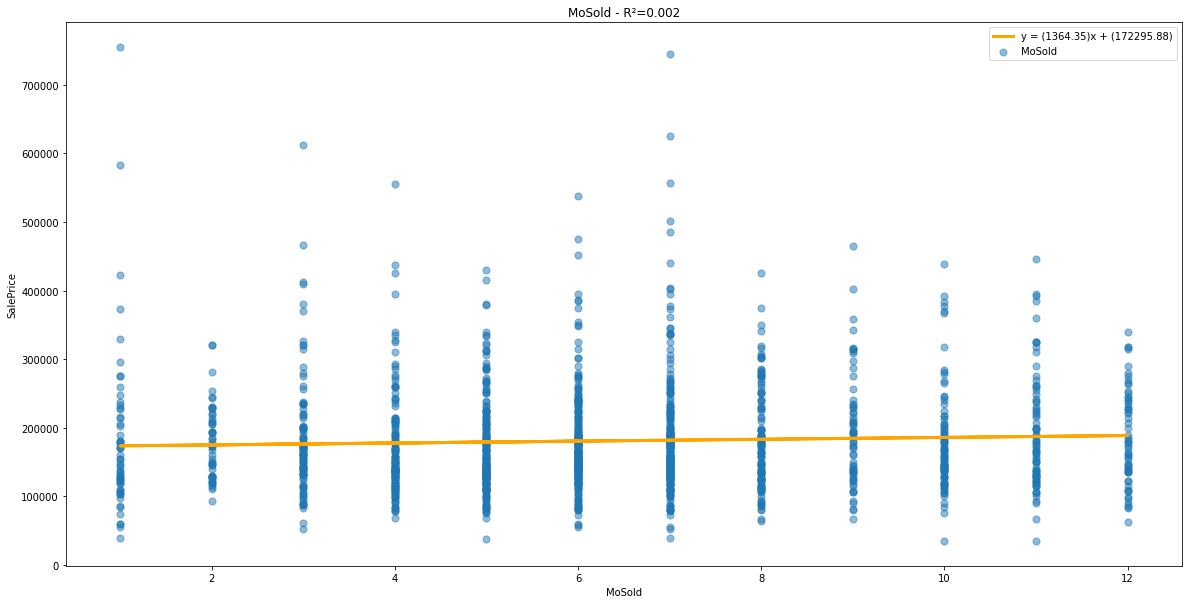

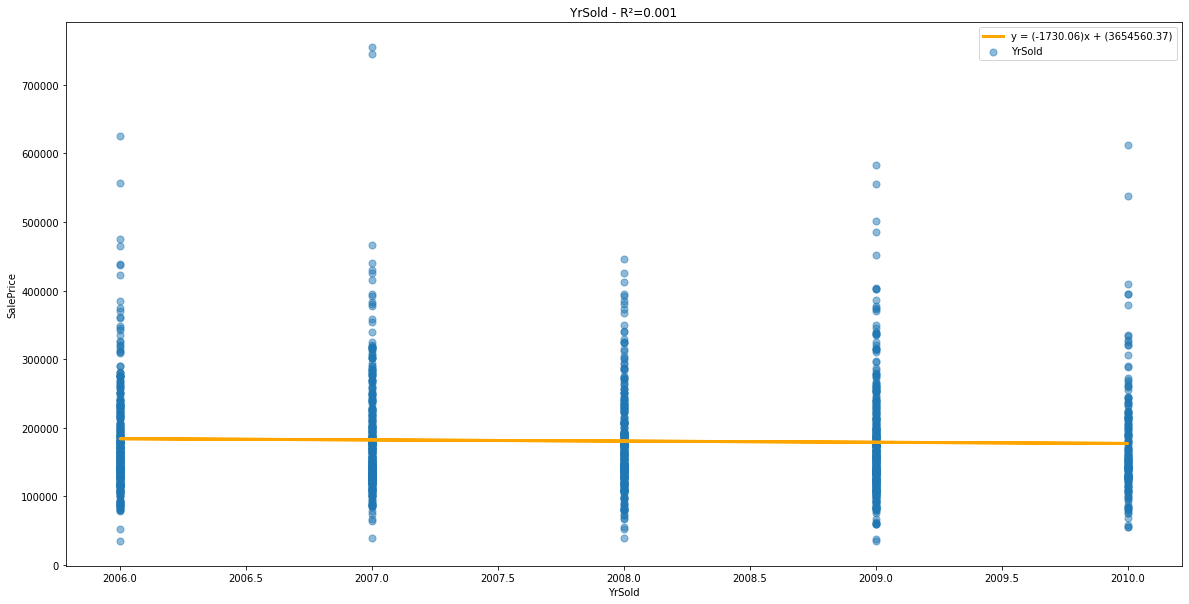

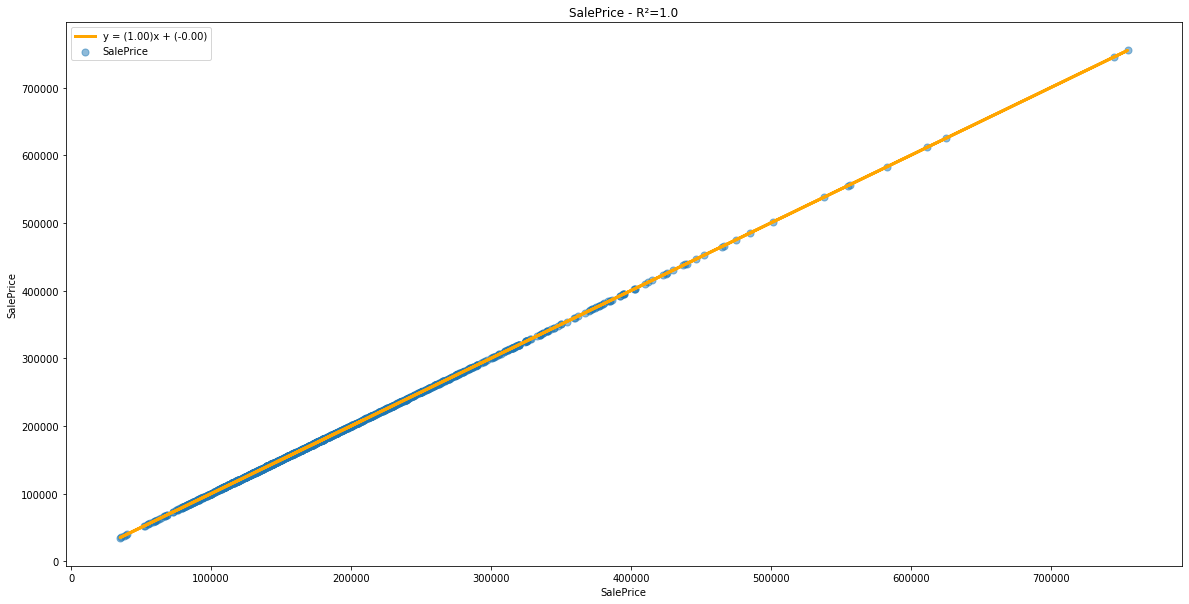

In [51]:
EDA.export_description_continuos_variables(train, 'SalePrice')

In [52]:
train.drop(columns = EDA.dataframe_description(train).query('`% de Missing`>0').index.to_list(), inplace=True)
test.drop(columns = EDA.dataframe_description(train).query('`% de Missing`>0').index.to_list(), inplace=True)

In [53]:
# transformo em dummies
train = pd.get_dummies(train)
test = pd.get_dummies(train)

# Get missing columns in the training test
missing_cols = set(train.columns) - set(test.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]

print('Treino shape:{}'.format(train.shape))
print('Teste shape:{}'.format(test.shape))

Treino shape:(1460, 217)
Teste shape:(1460, 217)


In [54]:
target = 'SalePrice'

X_train, X_test, y_train, y_test= train_test_split(train.drop(columns = target),
                                                   train[target],
                                                   test_size=1/3, 
                                                   random_state=seed)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(973, 216)
y_train shape:(973,)
X_test shape:(487, 216)
y_test shape:(487,)


In [55]:
regressor = DecisionTreeRegressor(random_state=seed)
regressor.fit(X_train, y_train)

print('Training set score:{:.3f}\nTest set score:{:.3f}'
      .format(regressor.score(X_train, y_train),regressor.score(X_test, y_test)))

Training set score:1.000
Test set score:0.744


In [120]:
cv_df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_r2', ascending=True)

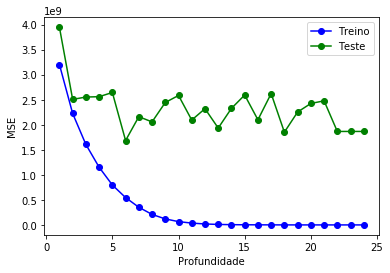

In [198]:
mse_train = {}
mse_test = {}

for max_depth_ in np.arange(1,25,1):
    regressor = DecisionTreeRegressor(random_state=seed,max_depth=max_depth_)
    regressor.fit(X_train, y_train)
#     print(regressor.tree_.max_depth)
    results= model_functions.regression_metrics(regressor,X_train, X_test, y_train, y_test,verbose=False)
    mse_train[max_depth_]=mean_squared_error(y_train, regressor.predict(X_train))
    mse_test[max_depth_]=mean_squared_error(y_test, regressor.predict(X_test))

plt.plot(list(mse_train.keys()),list(mse_train.values()), c='b', marker='o', label = 'Treino')
plt.plot(list(mse_test.keys()),list(mse_test.values()), c='g', marker='o', label = 'Teste')
plt.xlabel('Profundidade')
plt.ylabel('MSE')
plt.legend()

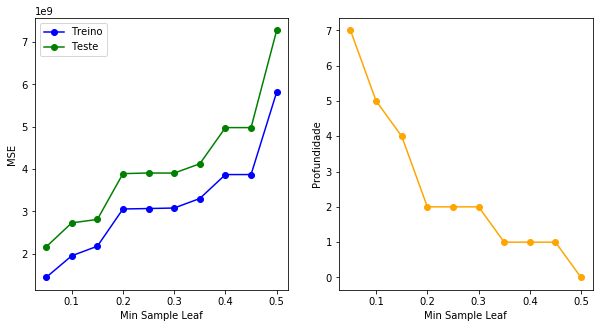

In [207]:
mse_train = {}
mse_test = {}
depth = {}

# min_samples_split specifies the minimum number of samples required to split an internal node
# while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.

for min_samples_leaf_ in np.arange(0.05,0.55,0.05):
    regressor = DecisionTreeRegressor(random_state=seed,min_samples_leaf = min_samples_leaf_)
    regressor.fit(X_train, y_train)
    depth[min_samples_leaf_] = regressor.tree_.max_depth
    mse_train[min_samples_leaf_]=mean_squared_error(y_train, regressor.predict(X_train))
    mse_test[min_samples_leaf_]=mean_squared_error(y_test, regressor.predict(X_test))


fig, axis = plt.subplots(1,2, figsize=(10,5))

axis[0].plot(list(mse_train.keys()),list(mse_train.values()), c='b', marker='o', label = 'Treino')
axis[0].plot(list(mse_test.keys()),list(mse_test.values()), c='g', marker='o', label = 'Teste')
axis[0].set_xlabel('Min Sample Leaf')
axis[0].set_ylabel('MSE')
axis[0].legend()
# plt.show()

axis[1].plot(list(depth.keys()),list(depth.values()), c='orange', marker='o', label = 'Profundidae');
axis[1].set_xlabel('Min Sample Leaf');
axis[1].set_ylabel('Profundidade');


In [227]:
from sklearn.model_selection import GridSearchCV

def grid_search(basemodel, param_grid, X,y,nfolds):
    
    #use gridsearch to test all values
    gridsearch = GridSearchCV(basemodel, 
                              param_grid, 
                              cv=nfolds,
                              scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'],
                              return_train_score=True,
                              refit= 'r2',
                             verbose=3)
    
    #fit model to data
    gridsearch.fit(X, y)
    
    return gridsearch

In [114]:
param_grid = {'criterion':['mse','mae'],
              'max_depth': np.arange(3, 15),
              'min_samples_leaf': np.arange(0.05,0.55,0.05)}
    
gs = grid_search(DecisionTreeRegressor(random_state=seed), param_grid, X_train ,y_train,5)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.05 ...............
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-29268.629, test=-31921.990), neg_mean_squared_error=(train=-1718334163.494, test=-1850986236.404), r2=(train=0.702, test=0.691), total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.05 ...............
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-30358.123, test=-35419.443), neg_mean_squared_error=(train=-1702258054.894, test=-2759880024.204), r2=(train=0.708, test=0.523), total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.05 ...............
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-29644.050, test=-34394.860), neg_mean_squared_error=(train=-1678511558.947, test=-2237320915.965), r2=(train=0.697, test=0.679), total=   0.0s
[CV] criterion=mse, max_dep

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.2 ................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.25 ...............
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.25 ...............
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-3916

[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-44484.278, test=-43925.726), neg_mean_squared_error=(train=-3867828641.982, test=-3999283486.666), r2=(train=0.336, test=0.308), total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.5 ................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-43448.013, test=-47432.799), neg_mean_squared_error=(train=-3671852814.346, test=-4754935398.030), r2=(train=0.336, test=0.317), total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.5 ................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-57250.109, test=-54421.880), neg_mean_squared_error=(train=-6007208403.464, test=-5070180213.561), r2=(train=0.000, test=-0.002), total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=0.5 ................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-57139

[CV]  criterion=mse, max_depth=4, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39234.140, test=-40402.031), neg_mean_squared_error=(train=-2979862860.014, test=-3521290258.909), r2=(train=0.489, test=0.391), total=   0.0s
[CV] criterion=mse, max_depth=4, min_samples_leaf=0.3 ................
[CV]  criterion=mse, max_depth=4, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-40374.893, test=-43364.657), neg_mean_squared_error=(train=-3183142499.455, test=-3811700334.177), r2=(train=0.425, test=0.453), total=   0.0s
[CV] criterion=mse, max_depth=4, min_samples_leaf=0.3 ................
[CV]  criterion=mse, max_depth=4, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39559.648, test=-38137.240), neg_mean_squared_error=(train=-3187484436.591, test=-2646048099.995), r2=(train=0.469, test=0.477), total=   0.0s
[CV] criterion=mse, max_depth=4, min_samples_leaf=0.3 ................
[CV]  criterion=mse, max_depth=4, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-40170.

[CV]  criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=0.1 ................
[CV]  criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=0.1 ................
[CV]  criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=0.1 ................
[CV]  criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.

[CV]  criterion=mse, max_depth=5, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-44563.360, test=-42977.342), neg_mean_squared_error=(train=-3984123062.132, test=-3420104432.410), r2=(train=0.337, test=0.324), total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=0.45 ...............
[CV]  criterion=mse, max_depth=5, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-44899.486, test=-42854.183), neg_mean_squared_error=(train=-3993167589.138, test=-3453793594.436), r2=(train=0.331, test=0.339), total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=0.5 ................
[CV]  criterion=mse, max_depth=5, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-44260.143, test=-45262.643), neg_mean_squared_error=(train=-3912222626.502, test=-3962850958.119), r2=(train=0.321, test=0.339), total=   0.0s
[CV] criterion=mse, max_depth=5, min_samples_leaf=0.5 ................
[CV]  criterion=mse, max_depth=5, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-4448

[CV]  criterion=mse, max_depth=6, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] criterion=mse, max_depth=6, min_samples_leaf=0.25 ...............
[CV]  criterion=mse, max_depth=6, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37679.677, test=-41263.615), neg_mean_squared_error=(train=-2963952918.695, test=-3559271747.300), r2=(train=0.464, test=0.489), total=   0.0s
[CV] criterion=mse, max_depth=6, min_samples_leaf=0.25 ...............
[CV]  criterion=mse, max_depth=6, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] criterion=mse, max_depth=6, min_samples_leaf=0.25 ...............
[CV]  criterion=mse, max_depth=6, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39

[CV]  criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=0.1 ................
[CV]  criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mse, max_depth=7, min_samples_leaf=0.15000000000000002, neg_me

[CV]  criterion=mse, max_depth=7, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-44770.145, test=-43177.069), neg_mean_squared_error=(train=-3978363446.041, test=-3477821873.244), r2=(train=0.333, test=0.334), total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=0.45 ...............
[CV]  criterion=mse, max_depth=7, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-43611.167, test=-45953.867), neg_mean_squared_error=(train=-3832699682.218, test=-4025744250.342), r2=(train=0.335, test=0.329), total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=0.45 ...............
[CV]  criterion=mse, max_depth=7, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-44326.914, test=-43566.020), neg_mean_squared_error=(train=-3847011467.827, test=-3964484956.462), r2=(train=0.340, test=0.314), total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=0.45 ...............
[CV]  criterion=mse, max_depth=7, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-432

[CV]  criterion=mse, max_depth=8, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-38635.377, test=-41241.872), neg_mean_squared_error=(train=-3054794559.177, test=-3176039061.077), r2=(train=0.470, test=0.470), total=   0.0s
[CV] criterion=mse, max_depth=8, min_samples_leaf=0.3 ................
[CV]  criterion=mse, max_depth=8, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39234.140, test=-40402.031), neg_mean_squared_error=(train=-2979862860.014, test=-3521290258.909), r2=(train=0.489, test=0.391), total=   0.0s
[CV] criterion=mse, max_depth=8, min_samples_leaf=0.3 ................
[CV]  criterion=mse, max_depth=8, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-40374.893, test=-43364.657), neg_mean_squared_error=(train=-3183142499.455, test=-3811700334.177), r2=(train=0.425, test=0.453), total=   0.0s
[CV] criterion=mse, max_depth=8, min_samples_leaf=0.3 ................
[CV]  criterion=mse, max_depth=8, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39559.

[CV]  criterion=mse, max_depth=9, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] criterion=mse, max_depth=9, min_samples_leaf=0.05 ...............
[CV]  criterion=mse, max_depth=9, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] criterion=mse, max_depth=9, min_samples_leaf=0.05 ...............
[CV]  criterion=mse, max_depth=9, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] criterion=mse, max_depth=9, min_samples_leaf=0.1 ................
[CV]  criterion=mse, max_depth=9, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-296

[CV]  criterion=mse, max_depth=9, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-44260.143, test=-45262.643), neg_mean_squared_error=(train=-3912222626.502, test=-3962850958.119), r2=(train=0.321, test=0.339), total=   0.0s
[CV] criterion=mse, max_depth=9, min_samples_leaf=0.5 ................
[CV]  criterion=mse, max_depth=9, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-44484.278, test=-43925.726), neg_mean_squared_error=(train=-3867828641.982, test=-3999283486.666), r2=(train=0.336, test=0.308), total=   0.0s
[CV] criterion=mse, max_depth=9, min_samples_leaf=0.5 ................
[CV]  criterion=mse, max_depth=9, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-43448.013, test=-47432.799), neg_mean_squared_error=(train=-3671852814.346, test=-4754935398.030), r2=(train=0.336, test=0.317), total=   0.0s
[CV] criterion=mse, max_depth=9, min_samples_leaf=0.5 ................
[CV]  criterion=mse, max_depth=9, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-57250.

[CV]  criterion=mse, max_depth=10, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-44326.914, test=-43566.020), neg_mean_squared_error=(train=-3847011467.827, test=-3964484956.462), r2=(train=0.340, test=0.314), total=   0.1s
[CV] criterion=mse, max_depth=10, min_samples_leaf=0.45 ..............
[CV]  criterion=mse, max_depth=10, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-43277.516, test=-47127.157), neg_mean_squared_error=(train=-3658278620.673, test=-4718815169.484), r2=(train=0.339, test=0.322), total=   0.0s
[CV] criterion=mse, max_depth=10, min_samples_leaf=0.45 ..............
[CV]  criterion=mse, max_depth=10, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-44563.360, test=-42977.342), neg_mean_squared_error=(train=-3984123062.132, test=-3420104432.410), r2=(train=0.337, test=0.324), total=   0.0s
[CV] criterion=mse, max_depth=10, min_samples_leaf=0.45 ..............
[CV]  criterion=mse, max_depth=10, min_samples_leaf=0.45, neg_mean_absolute_error=(train

[CV]  criterion=mse, max_depth=11, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-44551.752, test=-44310.700), neg_mean_squared_error=(train=-3939811520.084, test=-4007649675.671), r2=(train=0.344, test=0.208), total=   0.0s
[CV] criterion=mse, max_depth=11, min_samples_leaf=0.4 ...............
[CV]  criterion=mse, max_depth=11, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-44770.145, test=-43177.069), neg_mean_squared_error=(train=-3978363446.041, test=-3477821873.244), r2=(train=0.333, test=0.334), total=   0.0s
[CV] criterion=mse, max_depth=11, min_samples_leaf=0.45 ..............
[CV]  criterion=mse, max_depth=11, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-43611.167, test=-45953.867), neg_mean_squared_error=(train=-3832699682.218, test=-4025744250.342), r2=(train=0.335, test=0.329), total=   0.0s
[CV] criterion=mse, max_depth=11, min_samples_leaf=0.45 ..............
[CV]  criterion=mse, max_depth=11, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-

[CV]  criterion=mse, max_depth=12, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-41662.060, test=-39660.661), neg_mean_squared_error=(train=-3415711280.629, test=-2857452443.416), r2=(train=0.431, test=0.435), total=   0.0s
[CV] criterion=mse, max_depth=12, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mse, max_depth=12, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-42004.427, test=-37896.427), neg_mean_squared_error=(train=-3413234451.191, test=-2865860160.376), r2=(train=0.428, test=0.452), total=   0.0s
[CV] criterion=mse, max_depth=12, min_samples_leaf=0.4 ...............
[CV]  criterion=mse, max_depth=12, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-43611.167, test=-45953.867), neg_mean_squared_error=(train=-3832699682.218, test=-4025744250.342), r2=(train=0.335, test=0.329), total=   0.0s
[CV] criterion=mse, max_depth=12, min_samples_leaf=0.4 ...............
[CV]  criterion=mse, max_depth=12, min_samples_leaf=0.4, n

[CV]  criterion=mse, max_depth=13, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-40685.141, test=-43034.460), neg_mean_squared_error=(train=-3278233784.205, test=-3406675278.146), r2=(train=0.431, test=0.432), total=   0.0s
[CV] criterion=mse, max_depth=13, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mse, max_depth=13, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-41199.518, test=-42338.744), neg_mean_squared_error=(train=-3219794122.196, test=-3653550249.212), r2=(train=0.447, test=0.368), total=   0.0s
[CV] criterion=mse, max_depth=13, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mse, max_depth=13, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-40374.893, test=-43364.657), neg_mean_squared_error=(train=-3183142499.455, test=-3811700334.177), r2=(train=0.425, test=0.453), total=   0.0s
[CV] criterion=mse, max_depth=13, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mse, max_depth=13, min_s

[CV]  criterion=mse, max_depth=14, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-38635.377, test=-41241.872), neg_mean_squared_error=(train=-3054794559.177, test=-3176039061.077), r2=(train=0.470, test=0.470), total=   0.0s
[CV] criterion=mse, max_depth=14, min_samples_leaf=0.3 ...............
[CV]  criterion=mse, max_depth=14, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39234.140, test=-40402.031), neg_mean_squared_error=(train=-2979862860.014, test=-3521290258.909), r2=(train=0.489, test=0.391), total=   0.0s
[CV] criterion=mse, max_depth=14, min_samples_leaf=0.3 ...............
[CV]  criterion=mse, max_depth=14, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-40374.893, test=-43364.657), neg_mean_squared_error=(train=-3183142499.455, test=-3811700334.177), r2=(train=0.425, test=0.453), total=   0.0s
[CV] criterion=mse, max_depth=14, min_samples_leaf=0.3 ...............
[CV]  criterion=mse, max_depth=14, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39

[CV]  criterion=mae, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-28619.436, test=-27279.536), neg_mean_squared_error=(train=-1797143593.442, test=-1801996099.247), r2=(train=0.699, test=0.655), total=   0.1s
[CV] criterion=mae, max_depth=3, min_samples_leaf=0.1 ................
[CV]  criterion=mae, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29696.495, test=-31954.785), neg_mean_squared_error=(train=-2129569052.567, test=-2006362336.713), r2=(train=0.630, test=0.665), total=   0.0s
[CV] criterion=mae, max_depth=3, min_samples_leaf=0.1 ................
[CV]  criterion=mae, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29483.483, test=-32616.708), neg_mean_squared_error=(train=-1891299229.879, test=-2699562411.333), r2=(train=0.675, test=0.533), total=   0.0s
[CV] criterion=mae, max_depth=3, min_samples_leaf=0.1 ................
[CV]  criterion=mae, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29051

[CV]  criterion=mae, max_depth=3, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-43835.959, test=-43171.395), neg_mean_squared_error=(train=-3923308862.270, test=-3989262126.718), r2=(train=0.327, test=0.310), total=   0.0s
[CV] criterion=mae, max_depth=3, min_samples_leaf=0.45 ...............
[CV]  criterion=mae, max_depth=3, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-42869.437, test=-47048.877), neg_mean_squared_error=(train=-3737348214.527, test=-4845353439.636), r2=(train=0.324, test=0.304), total=   0.0s
[CV] criterion=mae, max_depth=3, min_samples_leaf=0.45 ...............
[CV]  criterion=mae, max_depth=3, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-44174.483, test=-42939.412), neg_mean_squared_error=(train=-4094703970.881, test=-3570537521.856), r2=(train=0.318, test=0.295), total=   0.0s
[CV] criterion=mae, max_depth=3, min_samples_leaf=0.45 ...............
[CV]  criterion=mae, max_depth=3, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-44

[CV]  criterion=mae, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38150.733, test=-37181.128), neg_mean_squared_error=(train=-3119934877.694, test=-3344145583.128), r2=(train=0.465, test=0.422), total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=0.25 ...............
[CV]  criterion=mae, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37159.794, test=-41115.969), neg_mean_squared_error=(train=-3029343104.946, test=-3785490875.097), r2=(train=0.452, test=0.456), total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=0.25 ...............
[CV]  criterion=mae, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38234.154, test=-36825.237), neg_mean_squared_error=(train=-3310274702.588, test=-2696853341.443), r2=(train=0.449, test=0.467), total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=0.25 ...............
[CV]  criterion=mae, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38

[CV]  criterion=mae, max_depth=4, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-55446.616, test=-52201.165), neg_mean_squared_error=(train=-6285643508.750, test=-5252381258.969), r2=(train=-0.046, test=-0.038), total=   0.0s
[CV] criterion=mae, max_depth=4, min_samples_leaf=0.5 ................
[CV]  criterion=mae, max_depth=4, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-55556.522, test=-51759.840), neg_mean_squared_error=(train=-6217679052.263, test=-5525290081.665), r2=(train=-0.042, test=-0.057), total=   0.0s
[CV] criterion=mae, max_depth=5, min_samples_leaf=0.05 ...............
[CV]  criterion=mae, max_depth=5, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25286.680, test=-27705.256), neg_mean_squared_error=(train=-1632941991.287, test=-1581586053.823), r2=(train=0.717, test=0.736), total=   0.1s
[CV] criterion=mae, max_depth=5, min_samples_leaf=0.05 ...............
[CV]  criterion=mae, max_depth=5, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-

[CV]  criterion=mae, max_depth=5, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-39752.380, test=-43120.933), neg_mean_squared_error=(train=-3252990733.229, test=-4031064969.764), r2=(train=0.412, test=0.421), total=   0.0s
[CV] criterion=mae, max_depth=5, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mae, max_depth=5, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-40815.068, test=-38878.845), neg_mean_squared_error=(train=-3541873221.202, test=-2906766073.402), r2=(train=0.410, test=0.426), total=   0.0s
[CV] criterion=mae, max_depth=5, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mae, max_depth=5, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-41165.239, test=-37491.541), neg_mean_squared_error=(train=-3506651154.343, test=-2951461210.655), r2=(train=0.412, test=0.435), total=   0.0s
[CV] criterion=mae, max_depth=5, min_samples_leaf=0.4 ................
[CV]  criterion=mae, max_depth=5, min_samples_

[CV]  criterion=mae, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31089.702, test=-35368.749), neg_mean_squared_error=(train=-2167683949.167, test=-2653879495.405), r2=(train=0.608, test=0.619), total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32056.018, test=-31379.567), neg_mean_squared_error=(train=-2295047633.268, test=-1887943063.093), r2=(train=0.618, test=0.627), total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mae, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32830.878, test=-28257.098), neg_mean_squared_error=(train=-2323679495.874, test=-1888312192.624), r2=(train=0.611, test=0.639), total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=0.2 ................
[CV]  criterion=mae, max_depth=6, min_samples_

[CV]  criterion=mae, max_depth=6, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-43019.951, test=-47411.056), neg_mean_squared_error=(train=-3754645843.769, test=-4886502538.995), r2=(train=0.321, test=0.298), total=   0.1s
[CV] criterion=mae, max_depth=6, min_samples_leaf=0.5 ................
[CV]  criterion=mae, max_depth=6, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-55446.616, test=-52201.165), neg_mean_squared_error=(train=-6285643508.750, test=-5252381258.969), r2=(train=-0.046, test=-0.038), total=   0.0s
[CV] criterion=mae, max_depth=6, min_samples_leaf=0.5 ................
[CV]  criterion=mae, max_depth=6, min_samples_leaf=0.5, neg_mean_absolute_error=(train=-55556.522, test=-51759.840), neg_mean_squared_error=(train=-6217679052.263, test=-5525290081.665), r2=(train=-0.042, test=-0.057), total=   0.0s
[CV] criterion=mae, max_depth=7, min_samples_leaf=0.05 ...............
[CV]  criterion=mae, max_depth=7, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-2

[CV]  criterion=mae, max_depth=7, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-39752.380, test=-43120.933), neg_mean_squared_error=(train=-3252990733.229, test=-4031064969.764), r2=(train=0.412, test=0.421), total=   0.0s
[CV] criterion=mae, max_depth=7, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mae, max_depth=7, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-40815.068, test=-38878.845), neg_mean_squared_error=(train=-3541873221.202, test=-2906766073.402), r2=(train=0.410, test=0.426), total=   0.0s
[CV] criterion=mae, max_depth=7, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mae, max_depth=7, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-41165.239, test=-37491.541), neg_mean_squared_error=(train=-3506651154.343, test=-2951461210.655), r2=(train=0.412, test=0.435), total=   0.0s
[CV] criterion=mae, max_depth=7, min_samples_leaf=0.4 ................
[CV]  criterion=mae, max_depth=7, min_samples_

[CV]  criterion=mae, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31454.915, test=-33908.462), neg_mean_squared_error=(train=-2048706444.147, test=-2849772037.487), r2=(train=0.648, test=0.507), total=   0.0s
[CV] criterion=mae, max_depth=8, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31089.702, test=-35368.749), neg_mean_squared_error=(train=-2167683949.167, test=-2653879495.405), r2=(train=0.608, test=0.619), total=   0.0s
[CV] criterion=mae, max_depth=8, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mae, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32056.018, test=-31379.567), neg_mean_squared_error=(train=-2295047633.268, test=-1887943063.093), r2=(train=0.618, test=0.627), total=   0.0s
[CV] criterion=mae, max_depth=8, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mae, max_depth=8, min_samples_

[CV]  criterion=mae, max_depth=9, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25062.387, test=-27739.872), neg_mean_squared_error=(train=-1627441027.276, test=-1580766502.541), r2=(train=0.718, test=0.736), total=   0.1s
[CV] criterion=mae, max_depth=9, min_samples_leaf=0.05 ...............
[CV]  criterion=mae, max_depth=9, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-23520.477, test=-32138.590), neg_mean_squared_error=(train=-1265829439.415, test=-2434076888.549), r2=(train=0.783, test=0.579), total=   0.0s
[CV] criterion=mae, max_depth=9, min_samples_leaf=0.05 ...............
[CV]  criterion=mae, max_depth=9, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24504.378, test=-29725.077), neg_mean_squared_error=(train=-1423586510.442, test=-1994277043.692), r2=(train=0.743, test=0.714), total=   0.0s
[CV] criterion=mae, max_depth=9, min_samples_leaf=0.05 ...............
[CV]  criterion=mae, max_depth=9, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26

[CV]  criterion=mae, max_depth=9, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39752.380, test=-43120.933), neg_mean_squared_error=(train=-3252990733.229, test=-4031064969.764), r2=(train=0.412, test=0.421), total=   0.0s
[CV] criterion=mae, max_depth=9, min_samples_leaf=0.3 ................
[CV]  criterion=mae, max_depth=9, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-38675.617, test=-37766.474), neg_mean_squared_error=(train=-3369099243.281, test=-2753427887.835), r2=(train=0.439, test=0.456), total=   0.0s
[CV] criterion=mae, max_depth=9, min_samples_leaf=0.3 ................
[CV]  criterion=mae, max_depth=9, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39212.094, test=-35602.335), neg_mean_squared_error=(train=-3330087285.280, test=-2803566674.572), r2=(train=0.442, test=0.463), total=   0.0s
[CV] criterion=mae, max_depth=9, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mae, max_depth=9, min_samples_leaf=0.35000000000000003, neg_mean_absolute_erro

[CV]  criterion=mae, max_depth=10, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25331.976, test=-26326.082), neg_mean_squared_error=(train=-1560018113.534, test=-1554854458.814), r2=(train=0.739, test=0.702), total=   0.1s
[CV] criterion=mae, max_depth=10, min_samples_leaf=0.1 ...............
[CV]  criterion=mae, max_depth=10, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29197.909, test=-31579.400), neg_mean_squared_error=(train=-2089550155.395, test=-1981959772.610), r2=(train=0.637, test=0.669), total=   0.1s
[CV] criterion=mae, max_depth=10, min_samples_leaf=0.1 ...............
[CV]  criterion=mae, max_depth=10, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29483.483, test=-32616.708), neg_mean_squared_error=(train=-1891299229.879, test=-2699562411.333), r2=(train=0.675, test=0.533), total=   0.0s
[CV] criterion=mae, max_depth=10, min_samples_leaf=0.1 ...............
[CV]  criterion=mae, max_depth=10, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-2

[CV]  criterion=mae, max_depth=10, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-42448.147, test=-46150.510), neg_mean_squared_error=(train=-3980796207.519, test=-4875291436.612), r2=(train=0.280, test=0.300), total=   0.0s
[CV] criterion=mae, max_depth=10, min_samples_leaf=0.4 ...............
[CV]  criterion=mae, max_depth=10, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-43347.058, test=-42605.495), neg_mean_squared_error=(train=-4085109789.879, test=-4032740320.825), r2=(train=0.320, test=0.203), total=   0.0s
[CV] criterion=mae, max_depth=10, min_samples_leaf=0.4 ...............
[CV]  criterion=mae, max_depth=10, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-43943.467, test=-41018.490), neg_mean_squared_error=(train=-4312589821.198, test=-3627145294.552), r2=(train=0.277, test=0.306), total=   0.0s
[CV] criterion=mae, max_depth=10, min_samples_leaf=0.45 ..............
[CV]  criterion=mae, max_depth=10, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-4

[CV]  criterion=mae, max_depth=11, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37549.186, test=-39568.897), neg_mean_squared_error=(train=-3158318048.454, test=-3285516460.815), r2=(train=0.452, test=0.452), total=   0.0s
[CV] criterion=mae, max_depth=11, min_samples_leaf=0.2 ...............
[CV]  criterion=mae, max_depth=11, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-38150.733, test=-37181.128), neg_mean_squared_error=(train=-3119934877.694, test=-3344145583.128), r2=(train=0.465, test=0.422), total=   0.0s
[CV] criterion=mae, max_depth=11, min_samples_leaf=0.2 ...............
[CV]  criterion=mae, max_depth=11, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37159.794, test=-41115.969), neg_mean_squared_error=(train=-3029343104.946, test=-3785490875.097), r2=(train=0.452, test=0.456), total=   0.0s
[CV] criterion=mae, max_depth=11, min_samples_leaf=0.2 ...............
[CV]  criterion=mae, max_depth=11, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-38

[CV]  criterion=mae, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25062.387, test=-27739.872), neg_mean_squared_error=(train=-1627441027.276, test=-1580766502.541), r2=(train=0.718, test=0.736), total=   0.1s
[CV] criterion=mae, max_depth=12, min_samples_leaf=0.05 ..............
[CV]  criterion=mae, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-23520.477, test=-32138.590), neg_mean_squared_error=(train=-1265829439.415, test=-2434076888.549), r2=(train=0.783, test=0.579), total=   0.1s
[CV] criterion=mae, max_depth=12, min_samples_leaf=0.05 ..............
[CV]  criterion=mae, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24504.378, test=-29725.077), neg_mean_squared_error=(train=-1423586510.442, test=-1994277043.692), r2=(train=0.743, test=0.714), total=   0.1s
[CV] criterion=mae, max_depth=12, min_samples_leaf=0.05 ..............
[CV]  criterion=mae, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train

[CV]  criterion=mae, max_depth=12, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-38675.617, test=-37766.474), neg_mean_squared_error=(train=-3369099243.281, test=-2753427887.835), r2=(train=0.439, test=0.456), total=   0.0s
[CV] criterion=mae, max_depth=12, min_samples_leaf=0.3 ...............
[CV]  criterion=mae, max_depth=12, min_samples_leaf=0.3, neg_mean_absolute_error=(train=-39212.094, test=-35602.335), neg_mean_squared_error=(train=-3330087285.280, test=-2803566674.572), r2=(train=0.442, test=0.463), total=   0.0s
[CV] criterion=mae, max_depth=12, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mae, max_depth=12, min_samples_leaf=0.35000000000000003, neg_mean_absolute_error=(train=-40023.359, test=-42098.128), neg_mean_squared_error=(train=-3379271146.397, test=-3546077208.508), r2=(train=0.414, test=0.409), total=   0.0s
[CV] criterion=mae, max_depth=12, min_samples_leaf=0.35000000000000003 
[CV]  criterion=mae, max_depth=12, min_samples_leaf=0.35000000000000003, 

[CV]  criterion=mae, max_depth=13, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30095.353, test=-29550.186), neg_mean_squared_error=(train=-2136427320.046, test=-1783094186.804), r2=(train=0.644, test=0.648), total=   0.1s
[CV] criterion=mae, max_depth=13, min_samples_leaf=0.1 ...............
[CV]  criterion=mae, max_depth=13, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30742.357, test=-26746.789), neg_mean_squared_error=(train=-2161443028.608, test=-1718476158.861), r2=(train=0.638, test=0.671), total=   0.0s
[CV] criterion=mae, max_depth=13, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mae, max_depth=13, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32390.397, test=-36243.323), neg_mean_squared_error=(train=-2448781372.618, test=-2487071064.838), r2=(train=0.575, test=0.585), total=   0.0s
[CV] criterion=mae, max_depth=13, min_samples_leaf=0.15000000000000002 
[CV]  criterion=mae, max_depth=13, min_samples_leaf=0.15000000000000002, 

[CV]  criterion=mae, max_depth=13, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-43347.058, test=-42605.495), neg_mean_squared_error=(train=-4085109789.879, test=-4032740320.825), r2=(train=0.320, test=0.203), total=   0.0s
[CV] criterion=mae, max_depth=13, min_samples_leaf=0.4 ...............
[CV]  criterion=mae, max_depth=13, min_samples_leaf=0.4, neg_mean_absolute_error=(train=-43943.467, test=-41018.490), neg_mean_squared_error=(train=-4312589821.198, test=-3627145294.552), r2=(train=0.277, test=0.306), total=   0.0s
[CV] criterion=mae, max_depth=13, min_samples_leaf=0.45 ..............
[CV]  criterion=mae, max_depth=13, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-43288.634, test=-45358.159), neg_mean_squared_error=(train=-3894621958.737, test=-4123271946.969), r2=(train=0.324, test=0.312), total=   0.0s
[CV] criterion=mae, max_depth=13, min_samples_leaf=0.45 ..............
[CV]  criterion=mae, max_depth=13, min_samples_leaf=0.45, neg_mean_absolute_error=(train=-

[CV]  criterion=mae, max_depth=14, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-38636.805, test=-35230.098), neg_mean_squared_error=(train=-3261160413.008, test=-2780176481.273), r2=(train=0.454, test=0.468), total=   0.0s
[CV] criterion=mae, max_depth=14, min_samples_leaf=0.25 ..............
[CV]  criterion=mae, max_depth=14, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37549.186, test=-39568.897), neg_mean_squared_error=(train=-3158318048.454, test=-3285516460.815), r2=(train=0.452, test=0.452), total=   0.0s
[CV] criterion=mae, max_depth=14, min_samples_leaf=0.25 ..............
[CV]  criterion=mae, max_depth=14, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38150.733, test=-37181.128), neg_mean_squared_error=(train=-3119934877.694, test=-3344145583.128), r2=(train=0.465, test=0.422), total=   0.0s
[CV] criterion=mae, max_depth=14, min_samples_leaf=0.25 ..............
[CV]  criterion=mae, max_depth=14, min_samples_leaf=0.25, neg_mean_absolute_error=(train=

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   24.8s finished


In [208]:
regressor = gs.best_estimator_

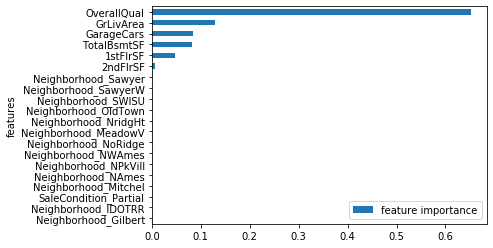

In [209]:
feature_imp = plot_feature_importance(regressor)

In [56]:
results =model_functions.metrics(regressor, 'regression', X_train, X_test, y_train, y_test)
pd.DataFrame(results)


### TREINO:###

explained_variance:  1.0
mean_squared_log_error:  0.0
MAE:  0.0
MSE:  0.0
RMSE:  0.0
Median Absolute Error:  0.0
r2:  1.0

### TESTE:###

explained_variance:  0.7447
mean_squared_log_error:  0.0403
MAE:  27052.8501
MSE:  1865927660.7515
RMSE:  207.8374
Median Absolute Error:  16207.0
r2:  0.7437


train           test
explained_variance  1.000          0.745
mslogerror          0.000          0.040
mae                 0.000      27052.850
mse                 0.000 1865927660.752
rmse                0.000      43196.385
median_abs_error    0.000      16207.000
r2                  1.000          0.744

# Cost Complexity Prunning

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

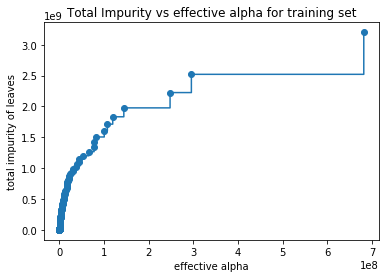

In [216]:
regressor = DecisionTreeRegressor(random_state=0)

path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [219]:
regressors = []
for ccp_alpha in ccp_alphas:
    regressors = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    regressors.fit(X_train, y_train)
    regressors.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      regressors[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 2618131881.739091


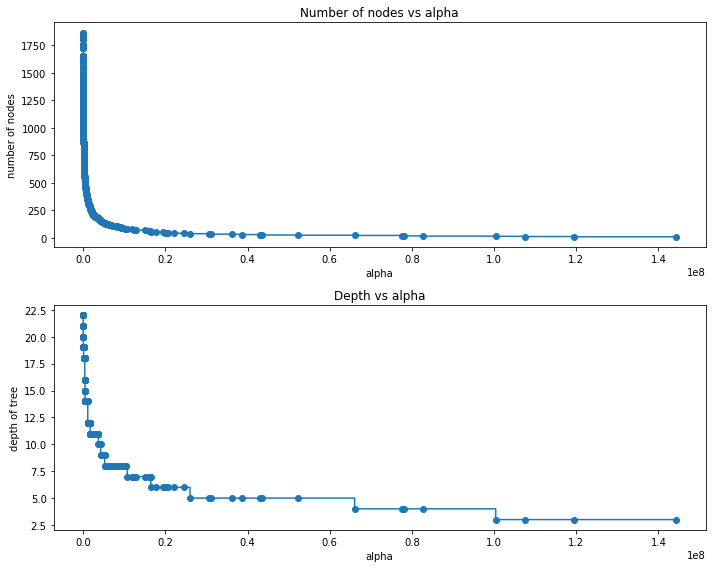

In [226]:
regressors = regressors[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [regressor.tree_.node_count for regressor in regressors]
depth = [regressor.tree_.max_depth for regressor in regressors]
fig, ax = plt.subplots(2, 1, figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

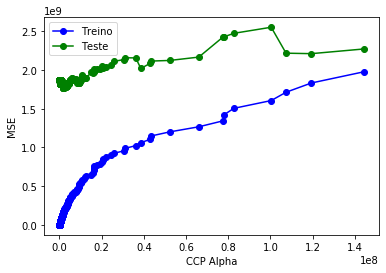

In [229]:
mse_train = {}
mse_test = {}

for ccp_alphas_ in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=seed,ccp_alpha=ccp_alphas_)
    regressor.fit(X_train, y_train)
#     print(regressor.tree_.max_depth)
    results= model_functions.regression_metrics(regressor,X_train, X_test, y_train, y_test,verbose=False)
    mse_train[ccp_alphas_]=mean_squared_error(y_train, regressor.predict(X_train))
    mse_test[ccp_alphas_]=mean_squared_error(y_test, regressor.predict(X_test))

plt.plot(list(mse_train.keys()),list(mse_train.values()), c='b', marker='o', label = 'Treino')
plt.plot(list(mse_test.keys()),list(mse_test.values()), c='g', marker='o', label = 'Teste')
plt.xlabel('CCP Alpha')
plt.ylabel('MSE')
plt.legend()

In [237]:
ccp_alphas[::80]

array([0.00000000e+00, 5.13874615e+02, 1.66495375e+03, 4.62487153e+03,
       1.25899281e+04, 2.77903392e+04, 5.66546763e+04, 1.30936108e+05,
       2.89059059e+05, 7.06574011e+05, 1.92062982e+06, 1.04725934e+07])

In [238]:
param_grid = {'criterion':['mse'],
              'max_depth': np.arange(3, 15),
              'min_samples_leaf': np.arange(0.05,0.3,0.05),
              'ccp_alpha':ccp_alphas[::80]}
    
gs = grid_search(DecisionTreeRegressor(random_state=seed), param_grid, X_train ,y_train,5)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.05 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-29268.629, test=-31921.990), neg_mean_squared_error=(train=-1718334163.494, test=-1850986236.404), r2=(train=0.702, test=0.691), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.05 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-30358.123, test=-35419.443), neg_mean_squared_error=(train=-1702258054.894, test=-2759880024.204), r2=(train=0.708, test=0.523), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.05 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-29644.050, test=-34394.860), neg_mean_squared_error=(train=-1678511558.947, test=-2237320915.965), r2=(train=0.697, test=0.67

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.2 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.2 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=3, min_samples_leaf=0.25 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=3, 

[CV]  ccp_alpha=0.0, criterion=mse, max_depth=5, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=5, min_samples_leaf=0.1 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29615.112, test=-35610.112), neg_mean_squared_error=(train=-1956655101.874, test=-2209879960.277), r2=(train=0.660, test=0.631), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=5, min_samples_leaf=0.1 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=5, min_samples_leaf=0.1 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=5,

[CV]  ccp_alpha=0.0, criterion=mse, max_depth=6, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=6, min_samples_leaf=0.2 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=6, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=6, min_samples_leaf=0.2 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=6, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=6, min_samples_leaf=0.2 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=6, 

[CV]  ccp_alpha=0.0, criterion=mse, max_depth=7, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=7, min_samples_leaf=0.25 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=7, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=8, min_samples_leaf=0.05 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=8, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25675.767, test=-29177.519), neg_mean_squared_error=(train=-1470752102.134, test=-1661723987.728), r2=(train=0.745, test=0.723), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=8, min_samples_leaf=0.05 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=

[CV]  ccp_alpha=0.0, criterion=mse, max_depth=9, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=9, min_samples_leaf=0.1 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=9, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=9, min_samples_leaf=0.1 .
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=9, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=0.0, criterion=mse

[CV]  ccp_alpha=0.0, criterion=mse, max_depth=10, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=10, min_samples_leaf=0.2 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=10, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=10, min_samples_leaf=0.2 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=10, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=10, min_samples_leaf=0.2 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=

[CV]  ccp_alpha=0.0, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=12, min_samples_leaf=0.1 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=12, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29615.112, test=-35610.112), neg_mean_squared_error=(train=-1956655101.874, test=-2209879960.277), r2=(train=0.660, test=0.631), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=12, min_samples_leaf=0.1 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=12, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=12, min_samples_leaf=0.1 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth

[CV]  ccp_alpha=0.0, criterion=mse, max_depth=13, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32252.246, test=-27557.060), neg_mean_squared_error=(train=-2187772835.191, test=-1715917647.741), r2=(train=0.633, test=0.672), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=13, min_samples_leaf=0.2 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-36862.605, test=-40235.676), neg_mean_squared_error=(train=-2942805400.767, test=-3128631393.074), r2=(train=0.489, test=0.478), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=13, min_samples_leaf=0.2 
[CV]  ccp_alpha=0.0, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=0.0, criterion=mse, max_depth=13, min_samples_leaf=0.2 
[CV]  ccp_alpha=0.0, criterion

[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-30505.348, test=-31601.588), neg_mean_squared_error=(train=-1865855162.775, test=-1903841185.367), r2=(train=0.687, test=0.636), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=3, min_samples_leaf=0.1 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30159.286, test=-36333.291), neg_mean_squared_error=(train=-1990834025.994, test=-2275307722.930), r2=(train=0.654, test=0.621), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=3, min_samples_leaf=0.1 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_dept

[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=4, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=4, min_samples_leaf=0.2 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=4, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=4, min_samples_leaf=0.25 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_dep

[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=6, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=6, min_samples_leaf=0.1 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=6, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=6, min_samples_leaf=0.1 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=6, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth

[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=7, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37679.677, test=-41263.615), neg_mean_squared_error=(train=-2963952918.695, test=-3559271747.300), r2=(train=0.464, test=0.489), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=7, min_samples_leaf=0.25 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=7, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=7, min_samples_leaf=0.25 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=7, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_

[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=9, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=9, min_samples_leaf=0.1 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=9, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=513.874614

[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=10, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=11, min_samples_leaf=0.05 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25675.767, test=-29177.519), neg_mean_squared_error=(train=-1470752102.134, test=-1661723987.728), r2=(train=0.745, test=0.723), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=11, min_samples_leaf=0.05 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse,

[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=12, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0.615, test=0.658), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=12, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=12, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32435.352, test=-33214.818), neg_mean_squared_error=(train=-2201565001.123, test=-1967158412.557), r2=(train=0.634, test=0.611), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=12, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=12, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32252.246, test=-27557.060), neg_mean_squared_error=(train=-2187772835.191, test=-1715917647.741), r2=(train=0.633,

[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=14, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=14, min_samples_leaf=0.05 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=14, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse, max_depth=14, min_samples_leaf=0.05 
[CV]  ccp_alpha=513.874614594039, criterion=mse, max_depth=14, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=513.874614594039, criterion=mse,

[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=3, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=3, min_samples_leaf=0.2 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=3, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=3, min_samples_leaf=0.2 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=3, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=ms

[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=5, min_samples_leaf=0.1 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=5, min_samples_leaf=0.1 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=ms

[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=6, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=6, min_samples_leaf=0.25 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=6, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=6, min_samples_leaf=0.25 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=6, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterio

[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=8, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=8, min_samples_leaf=0.1 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=8, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=8, min_samples_leaf=0.1 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=8, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=ms

[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=9, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=9, min_samples_leaf=0.25 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=9, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=10, min_samples_leaf=0.05 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=10, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25675.767, test=-29177.519), neg_mean_squared_error=(train=-1470752102.134, test=-1661723987.728), r2=(train=0.745, test=0.723), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, crite

[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0.615, test=0.658), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32435.352, test=-33214.818), neg_mean_squared_error=(train=-2201565001.123, test=-1967158412.557), r2=(tr

[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=13, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=13, min_samples_leaf=0.05 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=13, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=13, min_samples_leaf=0.05 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=13, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, cr

[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=14, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-36862.605, test=-40235.676), neg_mean_squared_error=(train=-2942805400.767, test=-3128631393.074), r2=(train=0.489, test=0.478), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=14, min_samples_leaf=0.2 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=14, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criterion=mse, max_depth=14, min_samples_leaf=0.2 
[CV]  ccp_alpha=1664.9537512846866, criterion=mse, max_depth=14, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=1664.9537512846866, criteri

[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=4, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30006.884, test=-33451.273), neg_mean_squared_error=(train=-1936478164.119, test=-2279723420.429), r2=(train=0.650, test=0.673), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=4, min_samples_leaf=0.1 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=4, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=4, min_samples_leaf=0.1 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=4, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max

[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=5, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=5, min_samples_leaf=0.25 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=5, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37679.677, test=-41263.615), neg_mean_squared_error=(train=-2963952918.695, test=-3559271747.300), r2=(train=0.464, test=0.489), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=5, min_samples_leaf=0.25 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=5, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse

[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=7, min_samples_leaf=0.1 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=7, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=7, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=4624.

[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=8, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=8, min_samples_leaf=0.25 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=8, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=9, min_samples_leaf=0.05 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=9, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25675.767, test=-29177.519), neg_mean_squared_error=(train=-1470752102.134, test=-1661723987.728), r2=(train=0.745, test=0.723), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse

[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0

[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=12, min_samples_leaf=0.05 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=12, min_samples_leaf=0.05 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterio

[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=13, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32252.246, test=-27557.060), neg_mean_squared_error=(train=-2187772835.191, test=-1715917647.741), r2=(train=0.633, test=0.672), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=13, min_samples_leaf=0.2 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-36862.605, test=-40235.676), neg_mean_squared_error=(train=-2942805400.767, test=-3128631393.074), r2=(train=0.489, test=0.478), total=   0.0s
[CV] ccp_alpha=4624.871531346352, criterion=mse, max_depth=13, min_samples_leaf=0.2 
[CV]  ccp_alpha=4624.871531346352, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=4624.87153134635

[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-30505.348, test=-31601.588), neg_mean_squared_error=(train=-1865855162.775, test=-1903841185.367), r2=(train=0.687, test=0.636), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=3, min_samples_leaf=0.1 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30159.286, test=-36333.291), neg_mean_squared_error=(train=-1990834025.994, test=-2275307722.930), r2=(train=0.654, test=0.621), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=3, min_samples_leaf=0.1 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=m

[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=4, min_samples_leaf=0.25 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37679.677, test=-41263.615), neg_mean_squared_error=(train=-2963952918.695, test=-3559271747.300), r2=(train=0.464, test=0.489), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=4, min_samples_leaf=0.25 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criteri

[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=6, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=6, min_samples_leaf=0.1 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=6, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=

[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=8, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25675.767, test=-29177.519), neg_mean_squared_error=(train=-1470752102.134, test=-1661723987.728), r2=(train=0.745, test=0.723), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=8, min_samples_leaf=0.05 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=8, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=8, min_samples_leaf=0.05 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=8, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criteri

[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0

[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=11, min_samples_leaf=0.05 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=11, min_samples_leaf=0.05 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=12589.928057553956, cr

[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=12, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32435.352, test=-33214.818), neg_mean_squared_error=(train=-2201565001.123, test=-1967158412.557), r2=(train=0.634, test=0.611), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=12, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=12, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32252.246, test=-27557.060), neg_mean_squared_error=(train=-2187772835.191, test=-1715917647.741), r2=(train=0.633, test=0.672), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=12, min_samples_leaf=0.2 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=12, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-36862.605, test=-40235.676), neg_mean_squared_error=(train=-2942805400.767, test=-3128631393.074), r2=(train=0.489, test=0.478), total=  

[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=14, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=14, min_samples_leaf=0.05 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=14, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] ccp_alpha=12589.928057553956, criterion=mse, max_depth=14, min_samples_leaf=0.1 
[CV]  ccp_alpha=12589.928057553956, criterion=mse, max_depth=14, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29615.112, test=-35610.112), neg_mean_squared_error=(train=-1956655101.874, test=-2209879960.277), r2=(train=0.660, test=0.631), total=   0.0s
[CV] ccp_alpha=12589.928057553956, crit

[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-29644.050, test=-34394.860), neg_mean_squared_error=(train=-1678511558.947, test=-2237320915.965), r2=(train=0.697, test=0.679), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=3, min_samples_leaf=0.05 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-31251.768, test=-32029.791), neg_mean_squared_error=(train=-1918228621.686, test=-1888944714.098), r2=(train=0.681, test=0.627), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=3, min_samples_leaf=0.05 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-30505.348, test=-31601.588), neg_mean_squared_error=(train=-1865855162.775, test=-1903841185.367), r2=(train=0.687, test=0.636), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse

[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=4, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=4, min_samples_leaf=0.25 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=4, min_samples_leaf=0.25 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse,

[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=6, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), to

[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=8, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=8, min_samples_leaf=0.05 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=8, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=8, min_samples_leaf=0.05 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=8, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse

[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32252.246, test=-27557.060), neg_mean_squared_error=(train=-2187772835.191, test=-1715917647.741), r2=(train=0.633, test=0.672), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=9, min_samples_leaf=0.2 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=9, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-36862.605, test=-40235.676), neg_mean_squared_error=(train=-2942805400.767, test=-3128631393.074), r2=(train=0.489, test=0.478), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=9, min_samples_leaf=0.2 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=9, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=27790.33915724563, cr

[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=11, min_samples_leaf=0.05 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=11, min_samples_leaf=0.05 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterio

[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=12, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=12, min_samples_leaf=0.2 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=12, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=12, min_samples_leaf=0.25 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=12, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=m

[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=14, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=14, min_samples_leaf=0.1 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=14, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse, max_depth=14, min_samples_leaf=0.1 
[CV]  ccp_alpha=27790.33915724563, criterion=mse, max_depth=14, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=27790.33915724563, criterion=mse

[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=3, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=4, min_samples_leaf=0.05 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=4, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26747.140, test=-30162.052), neg_mean_squared_error=(train=-1529328389.570, test=-1721367204.526), r2=(train=0.735, test=0.713), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=4, min_samples_leaf=0.05 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=4, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26908.025, test=-34378.666), neg_mean_squared_error=(train=-1421127483.730, test=-2638054436.203), r2=(train=0.756, test=0.544), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criteri

[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=5, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-36862.605, test=-40235.676), neg_mean_squared_error=(train=-2942805400.767, test=-3128631393.074), r2=(train=0.489, test=0.478), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=5, min_samples_leaf=0.2 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=5, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=5, min_samples_leaf=0.2 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=5, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=ms

[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29615.112, test=-35610.112), neg_mean_squared_error=(train=-1956655101.874, test=-2209879960.277), r2=(train=0.660, test=0.631), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=7, min_samples_leaf=0.1 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=7, min_samples_leaf=0.1 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=ms

[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=8, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=8, min_samples_leaf=0.25 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=8, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=8, min_samples_leaf=0.25 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=8, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterio

[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=10, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=

[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=12, min_samples_leaf=0.05 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=12, min_samples_leaf=0.05 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] ccp_alpha=56654.676258992804, cr

[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=13, min_samples_leaf=0.2 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criterion=mse, max_depth=13, min_samples_leaf=0.2 
[CV]  ccp_alpha=56654.676258992804, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=56654.676258992804, criteri

[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-33426.535, test=-29524.549), neg_mean_squared_error=(train=-2264439454.488, test=-1810886937.371), r2=(train=0.621, test=0.653), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506

[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=5, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24862.060, test=-29877.792), neg_mean_squared_error=(train=-1351859599.748, test=-1925183233.982), r2=(train=0.756, test=0.723), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=5, min_samples_leaf=0.05 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=5, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26640.372, test=-28138.654), neg_mean_squared_error=(train=-1579720435.918, test=-1585523331.818), r2=(train=0.737, test=0.687), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=5, min_samples_leaf=0.05 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=5, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criteri

[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=6, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=6, min_samples_leaf=0.2 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=6, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=6, min_samples_leaf=0.25 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=6, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=

[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0.615, test=0.658), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32435.352, test=-33214.818), neg_mean_squared_error=(train=-2201565001.123, test=-1967158412.557), r2=(train=0

[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=10, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29615.112, test=-35610.112), neg_mean_squared_error=(train=-1956655101.874, test=-2209879960.277), r2=(train=0.660, test=0.631), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=10, min_samples_leaf=0.1 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=10, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=10, min_samples_leaf=0.1 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=10, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criteri

[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=11, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=11, min_samples_leaf=0.25 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=11, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37679.677, test=-41263.615), neg_mean_squared_error=(train=-2963952918.695, test=-3559271747.300), r2=(train=0.464, test=0.489), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=11, min_samples_leaf=0.25 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=11, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=130936.10825623124, cr

[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=13, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=13, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=13, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0.615, test=0.658), total=   0.0s
[CV] ccp_alpha=130936.10825623124, criterion=mse, max_depth=13, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=130936.10825623124, criterion=mse, max_depth=13, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32435.352, test=-33214.818), neg_mean_squared_error=(train=-2201565001.123, test=-1967158412.557), r2=(tr

[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-31251.768, test=-32029.791), neg_mean_squared_error=(train=-1918228621.686, test=-1888944714.098), r2=(train=0.681, test=0.627), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=3, min_samples_leaf=0.05 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=3, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-30505.348, test=-31601.588), neg_mean_squared_error=(train=-1865855162.775, test=-1903841185.367), r2=(train=0.687, test=0.636), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=3, min_samples_leaf=0.1 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=3, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30159.286, test=-36333.291), neg_mean_squared_error=(train=-1990834025.994, test=-2275307722.930), r2=(train=0.654, test=0.621), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_de

[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37679.677, test=-41263.615), neg_mean_squared_error=(train=-2963952918.695, test=-3559271747.300), r2=(train=0.464, test=0.489), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=4, min_samples_leaf=0.25 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=4, min_samples_leaf=0.25 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=4, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_

[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0.615, test=0.658), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32435.352, test=-33214.818), neg_mean_squared_error=(train=-2201565001.123, test=-1967158412.557), r2=(train=0.634, test=0.611), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=6, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32252.246, test=-27557.060), neg_mean_squared_error=(train=-2187772835.191, test=-1715917647.741), r2=(train=0.633, test

[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=8, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=8, min_samples_leaf=0.1 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=8, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29615.112, test=-35610.112), neg_mean_squared_error=(train=-1956655101.874, test=-2209879960.277), r2=(train=0.660, test=0.631), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=8, min_samples_leaf=0.1 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=8, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_dept

[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=9, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=9, min_samples_leaf=0.25 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=9, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=9, min_samples_leaf=0.25 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=9, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_d

[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=11, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=11, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), to

[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=13, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=13, min_samples_leaf=0.05 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=13, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=13, min_samples_leaf=0.05 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=13, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25692.167, test=-25565.055), neg_mean_squared_error=(train=-1483288857.830, test=-1436223536.128), r2=(train=0.751, test=0.725), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse,

[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=14, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=14, min_samples_leaf=0.2 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=14, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_depth=14, min_samples_leaf=0.2 
[CV]  ccp_alpha=289059.058875375, criterion=mse, max_depth=14, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=289059.058875375, criterion=mse, max_

[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=4, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=4, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=4, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=4, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=4, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0.615,

[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=6, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=6, min_samples_leaf=0.05 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=6, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=6, min_samples_leaf=0.05 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=6, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse

[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=7, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=7, min_samples_leaf=0.2 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=7, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=7, min_samples_leaf=0.2 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=7, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max

[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=9, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=9, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), to

[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=11, min_samples_leaf=0.05 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=11, min_samples_leaf=0.05 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=11, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterio

[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=12, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-36862.605, test=-40235.676), neg_mean_squared_error=(train=-2942805400.767, test=-3128631393.074), r2=(train=0.489, test=0.478), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=12, min_samples_leaf=0.2 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=12, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=12, min_samples_leaf=0.2 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=12, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-37822.344, test=-41257.583), neg_mean_squared_error=(train=-2954769435.354, test=-3486691471.663), r2=(train=0.466, test=0.499), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse

[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=14, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=14, min_samples_leaf=0.1 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=14, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse, max_depth=14, min_samples_leaf=0.1 
[CV]  ccp_alpha=706574.0109626675, criterion=mse, max_depth=14, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=706574.0109626675, criterion=mse

[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=3, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39414.726, test=-37761.259), neg_mean_squared_error=(train=-3179309421.787, test=-2617124263.224), r2=(train=0.471, test=0.483), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=3, min_samples_leaf=0.25 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=3, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=4, min_samples_leaf=0.05 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=4, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26747.140, test=-30162.052), neg_mean_squared_error=(train=-1529328389.570, test=-1721367204.526), r2=(train=0.735, test=0.713), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criteri

[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=5, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32252.246, test=-27557.060), neg_mean_squared_error=(train=-2187772835.191, test=-1715917647.741), r2=(train=0.633, test=0.672), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=5, min_samples_leaf=0.2 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=5, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-36862.605, test=-40235.676), neg_mean_squared_error=(train=-2942805400.767, test=-3128631393.074), r2=(train=0.489, test=0.478), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=5, min_samples_leaf=0.2 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=5, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39149.472, test=-38283.958), neg_mean_squared_error=(train=-2969837528.285, test=-3413883447.399), r2=(train=0.490, test=0.410), total=   0.0s
[CV] ccp_alpha=1920629.81945270

[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=7, min_samples_leaf=0.1 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=7, min_samples_leaf=0.1 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=7, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=ms

[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=8, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=8, min_samples_leaf=0.25 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=8, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=8, min_samples_leaf=0.25 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=8, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterio

[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=10, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(tr

[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24811.373, test=-32851.236), neg_mean_squared_error=(train=-1313847790.518, test=-2549671304.839), r2=(train=0.775, test=0.559), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=12, min_samples_leaf=0.05 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-24294.348, test=-29697.664), neg_mean_squared_error=(train=-1328156837.550, test=-1919614962.401), r2=(train=0.760, test=0.724), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=12, min_samples_leaf=0.05 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=12, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26349.734, test=-28084.767), neg_mean_squared_error=(train=-1567522969.050, test=-1578182766.892), r2=(train=0.739, test=0.688), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, cr

[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39221.878, test=-37438.746), neg_mean_squared_error=(train=-3168709347.438, test=-2606224777.470), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=13, min_samples_leaf=0.2 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=13, min_samples_leaf=0.2, neg_mean_absolute_error=(train=-39468.467, test=-36310.859), neg_mean_squared_error=(train=-3147307371.907, test=-2693448432.952), r2=(train=0.473, test=0.485), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, criterion=mse, max_depth=13, min_samples_leaf=0.25 
[CV]  ccp_alpha=1920629.8194527072, criterion=mse, max_depth=13, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=1920629.8194527072, crite

[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33139.363, test=-37529.385), neg_mean_squared_error=(train=-2320608486.420, test=-2613048939.881), r2=(train=0.597, test=0.564), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=3, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-33347.070, test=-36066.081), neg_mean_squared_error=(train=-2209932198.420, test=-2538978096.582), r2=(train=0

[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29615.112, test=-35610.112), neg_mean_squared_error=(train=-1956655101.874, test=-2209879960.277), r2=(train=0.660, test=0.631), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=5, min_samples_leaf=0.1 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-30339.542, test=-34247.236), neg_mean_squared_error=(train=-1846389862.213, test=-2758430370.069), r2=(train=0.683, test=0.523), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=5, min_samples_leaf=0.1 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=5, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=ms

[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=6, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39536.303, test=-36528.196), neg_mean_squared_error=(train=-3150524283.364, test=-2711102280.518), r2=(train=0.472, test=0.481), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=7, min_samples_leaf=0.05 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=7, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25675.767, test=-29177.519), neg_mean_squared_error=(train=-1470752102.134, test=-1661723987.728), r2=(train=0.745, test=0.723), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=7, min_samples_leaf=0.05 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=7, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25112.234, test=-33313.553), neg_mean_squared_error=(train=-1326630072.458, test=-2563205237.494), r2=(train=0.772, test=0.557), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criteri

[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32047.158, test=-34815.598), neg_mean_squared_error=(train=-1978084039.831, test=-2854691771.455), r2=(train=0.661, test=0.506), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-31994.668, test=-34070.384), neg_mean_squared_error=(train=-2132336449.540, test=-2378376641.110), r2=(train=0.615, test=0.658), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=8, min_samples_leaf=0.15000000000000002, neg_mean_absolute_error=(train=-32435.352, test=-33214.818), neg_mean_squared_error=(train=-2201565001.123, test=-1967158412.557), r2=(train=0

[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=10, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-26442.544, test=-28434.076), neg_mean_squared_error=(train=-1573105365.352, test=-1586259960.606), r2=(train=0.738, test=0.687), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=10, min_samples_leaf=0.05 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=10, min_samples_leaf=0.05, neg_mean_absolute_error=(train=-25837.154, test=-25421.621), neg_mean_squared_error=(train=-1493034426.566, test=-1437644715.979), r2=(train=0.750, test=0.725), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=10, min_samples_leaf=0.1 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=10, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29615.112, test=-35610.112), neg_mean_squared_error=(train=-1956655101.874, test=-2209879960.277), r2=(train=0.660, test=0.631), total=   0.0s
[CV] ccp_alpha=10472593.445929967, crit

[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=11, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-38398.513, test=-41141.838), neg_mean_squared_error=(train=-3039765952.839, test=-3173553558.159), r2=(train=0.472, test=0.471), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=11, min_samples_leaf=0.25 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=11, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-39161.704, test=-39263.245), neg_mean_squared_error=(train=-2972430679.271, test=-3457638727.204), r2=(train=0.490, test=0.402), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=11, min_samples_leaf=0.25 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=11, min_samples_leaf=0.25, neg_mean_absolute_error=(train=-37679.677, test=-41263.615), neg_mean_squared_error=(train=-2963952918.695, test=-3559271747.300), r2=(train=0.464, test=0.489), total=   0.0s
[CV] ccp_alpha=10472593.445929967, cr

[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=13, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-29372.889, test=-31849.951), neg_mean_squared_error=(train=-1899891877.663, test=-2180019126.928), r2=(train=0.657, test=0.687), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=13, min_samples_leaf=0.1 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=13, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-31211.953, test=-31551.682), neg_mean_squared_error=(train=-2093027103.628, test=-1830795308.805), r2=(train=0.652, test=0.638), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criterion=mse, max_depth=13, min_samples_leaf=0.1 
[CV]  ccp_alpha=10472593.445929967, criterion=mse, max_depth=13, min_samples_leaf=0.1, neg_mean_absolute_error=(train=-32093.009, test=-27687.412), neg_mean_squared_error=(train=-2176256984.008, test=-1719781980.335), r2=(train=0.635, test=0.671), total=   0.0s
[CV] ccp_alpha=10472593.445929967, criteri

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   35.6s finished


In [242]:
cv_df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_r2', ascending=True)
cv_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
210          0.008         0.000            0.001           0.000   
615          0.006         0.008            0.000           0.000   
95           0.008         0.001            0.001           0.000   
570          0.003         0.006            0.003           0.006   
520          0.006         0.008            0.000           0.000   
..             ...           ...              ...             ...   
429          0.003         0.006            0.000           0.000   
434          0.011         0.009            0.000           0.000   
439          0.004         0.002            0.001           0.000   
599          0.009         0.008            0.000           0.000   
719          0.006         0.008            0.000           0.000   

    param_ccp_alpha param_criterion param_max_depth param_min_samples_leaf  \
210        4624.872             mse               9                  0.050   
615     1920629.819             mse               6                  0.050   
95          513.875             mse              10                  0.050   
570      706574.011             mse               9                  0.050   
520      289059.059             mse              11                  0.050   
..              ...             ...             ...                    ...   
429      130936.108             mse               4                  0.250   
434      130936.108             mse               5                  0.250   
439      130936.108             mse               6                  0.250   
599      706574.011             mse              14                  0.250   
719    10472593.446             mse              14                  0.250   

                                                params  \
210  {'ccp_alpha': 4624.871531346352, 'criterion': ...   
615  {'ccp_alpha': 1920629.8194527072, 'criterion':...   
95   {'ccp_alpha': 513.874614594039, 'criterion': '...   
570  {'ccp_alpha': 706574.0109626675, 'criterion': ...   
520  {'ccp_alpha': 289059.058875375, 'criterion': '...   
..                                                 ...   
429  {'ccp_alpha': 130936.10825623124, 'criterion':...   
434  {'ccp_alpha': 130936.10825623124, 'criterion':...   
439  {'ccp_alpha': 130936.10825623124, 'criterion':...   
599  {'ccp_alpha': 706574.0109626675, 'criterion': ...   
719  {'ccp_alpha': 10472593.445929967, 'criterion':...   

     split0_test_neg_mean_absolute_error  split1_test_neg_mean_absolute_error  \
210                           -29177.519                           -32851.236   
615                           -29177.519                           -32851.236   
95                            -29177.519                           -32851.236   
570                           -29177.519                           -32851.236   
520                           -29177.519                           -32851.236   
..                                   ...                                  ...   
429                           -41141.838                           -39263.245   
434                           -41141.838                           -39263.245   
439                           -41141.838                           -39263.245   
599                           -41141.838                           -39263.245   
719                           -41141.838                           -39263.245   

     split2_test_neg_mean_absolute_error  split3_test_neg_mean_absolute_error  \
210                           -29697.664                           -28084.767   
615                           -29697.664                           -28084.767   
95                            -29697.664                           -28084.767   
570                           -29697.664                           -28084.767   
520                           -29697.664                           -28084.767   
..                                   ...                                  ...   
42

In [57]:
results =model_functions.metrics(gs.best_estimator_, 'regression', X_train, X_test, y_train, y_test)
pd.DataFrame(results)

NameError: name 'gs' is not defined